In [1]:
import pdb
import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde
from datetime import datetime, timedelta
from faker import Faker
from sklearn.neighbors import KernelDensity
np.random.seed(3101)
random_state = np.random.RandomState(3101)
fake = Faker()
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

# Importing data:
bank1 = archive  
bank2 = bank+marketing

In [2]:
# print(os.getcwd())
bank_df_train = pd.read_csv('./data/main/train.csv')
bank_df_test = pd.read_csv('./data/main/test.csv')

In [3]:
print(bank_df_train.head())
print(len(bank_df_train))

# bank_df_train_clean = bank_df_train.drop_duplicates(subset="CustomerId", keep="first")
# print(len(bank_df_train_clean))

   id  CustomerId         Surname  CreditScore Geography Gender       Age  \
0   0    15674932  Okwudilichukwu          668    France   Male 33.000000   
1   1    15749177   Okwudiliolisa          627    France   Male 33.000000   
2   2    15694510           Hsueh          678    France   Male 40.000000   
3   3    15741417             Kao          581    France   Male 34.000000   
4   4    15766172       Chiemenam          716     Spain   Male 33.000000   

   Tenure       Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       3      0.000000              2   1.000000        0.000000   
1       1      0.000000              2   1.000000        1.000000   
2      10      0.000000              2   1.000000        0.000000   
3       2 148882.540000              1   1.000000        1.000000   
4       5      0.000000              2   1.000000        1.000000   

   EstimatedSalary  Exited  
0    181449.970000       0  
1     49503.500000       0  
2    184866.690000       0  
3     

In [4]:
print(bank_df_test.head())
len(bank_df_test)
# duplicates = bank_df_test.duplicated(subset=['CustomerId'], keep=False)
# print(duplicates)
#no "exited" column

       id  CustomerId    Surname  CreditScore Geography  Gender       Age  \
0  165034    15773898   Lucchese          586    France  Female 23.000000   
1  165035    15782418       Nott          683    France  Female 46.000000   
2  165036    15807120         K?          656    France  Female 34.000000   
3  165037    15808905  O'Donnell          681    France    Male 36.000000   
4  165038    15607314    Higgins          752   Germany    Male 38.000000   

   Tenure       Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000000              2   0.000000        1.000000   
1       2      0.000000              1   1.000000        0.000000   
2       7      0.000000              2   1.000000        0.000000   
3       8      0.000000              1   1.000000        0.000000   
4      10 121263.620000              1   1.000000        0.000000   

   EstimatedSalary  
0    160976.750000  
1     72549.270000  
2    138882.090000  
3    113931.570000  
4    139431.00000

110023

# redoing salary

In [5]:
# salary_df = pd.read_csv('./data/Salary_Data.csv')
# salary_df_cleaned = salary_df.dropna(subset=['Education Level'])
# print(salary_df_cleaned['Education Level'].unique())

# bachelors_df = salary_df[salary_df_cleaned['Education Level'] == "Bachelor's"]
# masters_df = salary_df_cleaned[salary_df_cleaned['Education Level'] == "Master's"]
# phd_df = salary_df_cleaned[salary_df_cleaned['Education Level'] == 'PhD']

# kde_bachelors = gaussian_kde(bachelors_df['Salary'])
# kde_masters = gaussian_kde(masters_df['Salary'])
# kde_phd = gaussian_kde(phd_df['Salary'])

# bank_df_train['EstimatedSalary'] = np.where(
#     bank_df_train['Education Level'] == "Bachelor's",
#     abs(kde_bachelors.resample(n_train).flatten() / 12).astype(int),
#     np.where(
#         salary_df['Education Level'] == "Master's",
#         abs(kde_masters.resample(n_train).flatten() / 12).astype(int),
#         abs(kde_phd.resample(n_train).flatten() / 12).astype(int),
#     )
# )


Data Cleaning

Removed CustomerId column in both test & train since it is an unused var in the original dataset
All other columns returns no duplicates
scalling tenure too to when the bank opened

Percentage of 0 entries in 'Balance': 54.32%


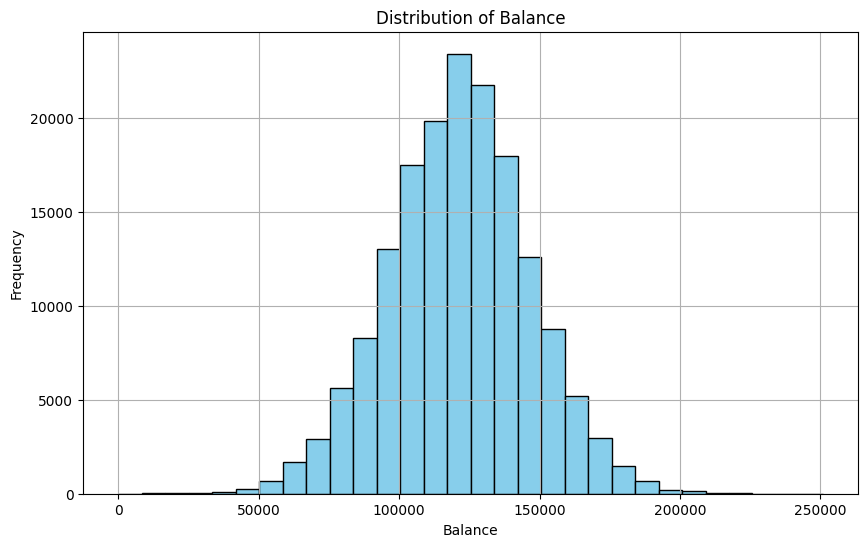

In [6]:
import matplotlib.pyplot as plt


zero_count = (bank_df_train['Balance'] == 0).sum()
total_count = len(bank_df_train)
zero_percentage = (zero_count / total_count) * 100

print(f"Percentage of 0 entries in 'Balance': {zero_percentage:.2f}%")

non_zero_data = bank_df_train.loc[bank_df_train['Balance'] != 0, 'Balance']
mean_non_zero = non_zero_data.mean()
std_non_zero = non_zero_data.std()

zero_indices = bank_df_train.index[bank_df_train['Balance'] == 0]
num_zeros = len(zero_indices)
random_samples = np.random.normal(loc=mean_non_zero, scale=std_non_zero, size=num_zeros)
bank_df_train.loc[zero_indices, 'Balance'] = random_samples
bank_df_train['Balance'] = bank_df_train['Balance'].round(2)


plt.figure(figsize=(10, 6))
plt.hist(bank_df_train['Balance'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.grid(True)
plt.show()


# OverSampling

In [7]:
# from sklearn.utils import resample
# percentage_exited_1 = (bank_df_train['Exited'] == 1).mean() * 100

# print(f"Percentage of Exited=1: {percentage_exited_1:.2f}%")

# class_distribution = bank_df_train['Exited'].value_counts(normalize=True)

# desired_percentage_exited_1 = 0.5

# while class_distribution[1] < desired_percentage_exited_1:
#     oversampled_minority = resample(
#         bank_df_train[bank_df_train['Exited'] == 1], 
#         replace=True,
#         n_samples=len(bank_df_train[bank_df_train['Exited'] == 0]),  
#         random_state=42
#     )
#     bank_df_train = pd.concat([bank_df_train, oversampled_minority])
#     class_distribution = bank_df_train['Exited'].value_counts(normalize=True)

# oversampled_class_distribution = bank_df_train['Exited'].value_counts(normalize=True)
# print(oversampled_class_distribution)
# print(len(bank_df_train))

# Customer ID

In [8]:
n_rows = len(bank_df_train)
new_customer_ids = range(1, n_rows + 1)

bank_df_train['CustomerId'] = new_customer_ids

In [9]:
# bank_df_train = bank_df_train.loc[:, bank_df_train.columns!='CustomerId'] # extract all columns except for CustomerId
# print(bank_df_train[bank_df_train.duplicated() == True]) # check for duplicate columns 

# bank_df_test = bank_df_test.loc[:, bank_df_test.columns!='CustomerId']

### DELETE OR COMMENT OUT THIS LATER ###
# bank_df_train.drop_duplicates(subset=['CustomerId'], inplace=True)
# bank_df_test.drop_duplicates(subset=['CustomerId'], inplace=True)
### DELETE OR COMMENT OUT THIS LATER ###
bank_df_train['Age'] = bank_df_train['Age'].astype(int)
bank_df_test['Age'] = bank_df_test['Age'].astype(int)

n_train = len(bank_df_train)
n_test = len(bank_df_test)
print(n_train)

aug_2022 = datetime(2022, 8, 31)
today = datetime.now()
months_since_aug_2022 = (today.year - aug_2022.year) * 12 + today.month - aug_2022.month - 2
def scale_int_to_months(int_val):
    return int_val * (months_since_aug_2022 / 10)
bank_df_train['Tenure'] = bank_df_train['Tenure'] * (months_since_aug_2022 / 10)
bank_df_train['Tenure'] = bank_df_train['Tenure'].astype(int)

random_numbers = np.random.rand(n_train)
threshold = 0.5
print(random_numbers)
bank_df_train.loc[random_numbers > threshold, 'Tenure'] += 1

print(bank_df_train['Tenure'].head(20))

165034
[0.63461568 0.31213008 0.56974709 ... 0.18298272 0.75245866 0.8570277 ]
0      6
1      1
2     19
3      3
4      9
5      8
6     14
7      1
8      7
9      7
10    11
11     5
12    17
13     9
14    12
15     9
16    12
17     8
18    15
19     1
Name: Tenure, dtype: int32


# Adding and populating features

### 13. Churn Date: The exact date the customer decided to exit.

In [10]:
start_date = datetime(2022, 8, 31)
end_date = end_date = datetime.now().strftime('%Y-%m-%d') 

# random_dates = pd.date_range(start=start_date, end=end_date, freq='D')
# random_dates_str = random_dates.strftime('%Y-%m-%d')
# bank_df_train['ChurnDate'] = np.where(bank_df_train['Exited'] == 1, np.random.choice(random_dates_str) , np.nan) 
def generate_random_date(exited, tenure_months):
    if exited == 1:
        tenure_days = tenure_months * 30
        random_date = np.random.choice(pd.date_range(start=start_date + timedelta(days=tenure_days), end=end_date, freq='D'))
        return random_date
    else:
        return np.nan
bank_df_train['ChurnDate'] = bank_df_train.apply(lambda row: generate_random_date(row['Exited'], row['Tenure']), axis=1)

# random_dates = pd.date_range(start=start_date, end=end_date, freq='D')
# random_dates_str = random_dates.strftime('%Y-%m-%d')
# bank_df_train['ChurnDate'] = np.where(bank_df_train['Exited'] == 1, np.random.choice(random_dates_str) , np.nan) 
# bank_df_train['ChurnDate'] = pd.to_datetime(bank_df_train['ChurnDate'])
print(bank_df_train[['Tenure', 'ChurnDate']].head(30))

    Tenure  ChurnDate
0        6        NaT
1        1        NaT
2       19        NaT
3        3        NaT
4        9        NaT
5        8 2024-01-22
6       14        NaT
7        1        NaT
8        7        NaT
9        7        NaT
10      11        NaT
11       5        NaT
12      17        NaT
13       9        NaT
14      12        NaT
15       9        NaT
16      12        NaT
17       8        NaT
18      15 2024-01-29
19       1 2022-11-12
20      16        NaT
21      15        NaT
22      16        NaT
23      17 2024-04-07
24      10        NaT
25      16 2024-03-23
26       5        NaT
27       3        NaT
28       7 2023-09-04
29      10        NaT


### months inactive


In [11]:
np.random.seed(3101)
bank_df_train['MonthsInactive'] = np.minimum(np.random.normal(0.5, 1.5, n_train), bank_df_train['Tenure'] * 12)
bank_df_train['MonthsInactive'] = np.maximum(bank_df_train['MonthsInactive'], 0)

bank_df_test['MonthsInactive'] = bank_df_test.apply(lambda row: 
    np.random.normal(0.5, 1.5) if row['IsActiveMember'] == 0 else 0,
    axis=1)

def set_max_to_tenure(row):
    return min(row['MonthsInactive'], row['Tenure'])

bank_df_train['MonthsInactive'] = np.maximum(bank_df_train['MonthsInactive'], 0)
bank_df_train['MonthsInactive'] = bank_df_train.apply(set_max_to_tenure, axis=1)
bank_df_train['MonthsInactive'] = bank_df_train['MonthsInactive'].astype(int)
bank_df_test['MonthsInactive'] = np.maximum(bank_df_test['MonthsInactive'], 0)
bank_df_test['MonthsInactive'] = bank_df_test.apply(set_max_to_tenure, axis=1)
bank_df_test['MonthsInactive'] = bank_df_test['MonthsInactive'].astype(int)

bank_df_train.loc[bank_df_train['Exited'] == 1, 'MonthsInactive'] = np.nan

print(bank_df_train[['Tenure', 'ChurnDate', 'MonthsInactive']].head(20))

### 15.Transaction History Freq
Detailed transaction data offers insights into spending patterns and engagement. (Transaction frequency in the last 28 days)

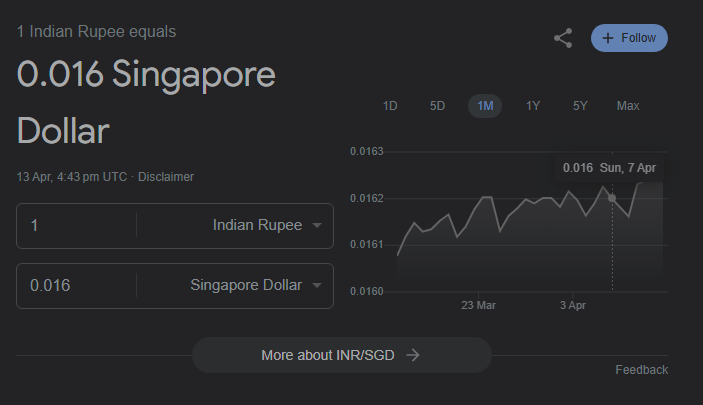


inr to sgd is * 0.016

In [ ]:
# transaction_df = pd.read_excel('./data/transaction_history.xlsx')

# # print(transaction_df.head())
# transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'])

# grouped_df = transaction_df.groupby('Account No')

# results = []
# for group_name, group_data in grouped_df:
#     # Get max and min dates for the group
#     max_date = group_data['DATE'].max()
#     min_date = max_date - pd.Timedelta(days=28)
    
#     # Filter group data for transactions within the date range
#     filtered_group = group_data[(group_data['DATE'] >= min_date) & (group_data['DATE'] <= max_date)]
    
#     # Calculate transaction frequency and amount for the group
#     transaction_frequency = len(filtered_group)
#     transaction_amount = filtered_group['DEPOSIT AMT'].sum()
    
#     # Append results to the list
#     results.append({
#         'Account No': group_name,
#         'Total Transaction Amount': transaction_amount,
#         'Transaction Frequency': transaction_frequency
#     })

# # Create DataFrame from results
# result_df = pd.DataFrame(results)

# result_df['Total Transaction Amount'] = result_df['Total Transaction Amount'].astype(int)
# pd.options.display.float_format = '{:,.0f}'.format
# # print(result_df['Total Transaction Amount'])

# # print("Minimum date in the dataset:", min_date)
# # print("Maximum date in the dataset:", max_date)

# kde_freq = gaussian_kde(result_df['Transaction Frequency'])
# kde_amnt = gaussian_kde(result_df['Total Transaction Amount'])
# # print(result_df['Total Transaction Amount'])

# fake_data_freq = kde_freq.resample(len(bank_df_train)).flatten()
# fake_data_freq = np.round(fake_data_freq).astype(int)
# bank_df_train['TransactionFreq'] = fake_data_freq
# fake_data_freq = kde_freq.resample(len(bank_df_test)).flatten()
# fake_data_freq = np.round(fake_data_freq).astype(int)
# bank_df_test['TransactionFreq'] = fake_data_freq

# # fake_data_amt = kde_amnt.resample(len(bank_df_train)).flatten()
# # # fake_data_amt = np.round(fake_data_amt).astype(int)
# # bank_df_train['TransactionAmnt'] = fake_data_amt
# # fake_data_amt = kde_amnt.resample(len(bank_df_test)).flatten()
# # # fake_data_amt = np.round(fake_data_amt).astype(int)
# # bank_df_test['TransactionAmnt'] = fake_data_amt

# # print(bank_df_train['TransactionAmnt'].head())
# date_28_days_ago = datetime.now() - timedelta(days=28)

# bank_df_train['TransactionFreq'] = np.where(
#     (bank_df_train['ChurnDate'] <= date_28_days_ago),
#     0,
#     bank_df_train['TransactionFreq']
# )

# bank_df_test['TransactionFreq'] = np.where(
#     (bank_df_test['IsActiveMember'] == 0),
#     0,
#     bank_df_test['TransactionFreq']
# )

# bank_df_train['TransactionFreq'] = np.maximum(bank_df_train['TransactionFreq'], 0)
# bank_df_test['TransactionFreq'] = np.maximum(bank_df_test['TransactionFreq'], 0)

# min_train_value = bank_df_train['TransactionFreq'].min()
# max_train_value = bank_df_train['TransactionFreq'].max()
# min_test_value = bank_df_test['TransactionFreq'].min()
# max_test_value = bank_df_test['TransactionFreq'].max()

# def scale_transaction_freq_train(freq):
#     scaled_freq = ((freq - min_train_value) / (max_train_value - min_train_value)) * 150
#     return scaled_freq

# def scale_transaction_freq_test(freq):
#     scaled_freq = ((freq - min_test_value) / (max_test_value - min_test_value)) * 150
#     return scaled_freq

# bank_df_train['TransactionFreq'] = bank_df_train['TransactionFreq'].apply(scale_transaction_freq_train).astype(int)

# bank_df_test['TransactionFreq'] = bank_df_test['TransactionFreq'].apply(scale_transaction_freq_test).astype(int)

# print(bank_df_train[['ChurnDate', 'TransactionFreq']].head(20))

   TransactionFreq  TransactionAmt
0                4      182.666495
1                6      143.569398
2               32      137.335693
3               31      210.146542
4               40      193.705012
5               59      158.661945
6                7      158.429087
7                8      159.083204
8               51      181.020193
9               30      189.206813
   TransactionFreq  TransactionAmt
0                0        0.000000
1                6     1504.220000
2                0        0.000000
3               31     7793.130000
4               40     8507.080000
5                0        0.000000
6                0        0.000000
7                0        0.000000
8                0        0.000000
9               30     6224.270000
<bound method NDFrame.describe of             id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0           1  Okwudilichukwu          668    France    Male   
1            1           2   Okwudiliolisa

C:\Users\caboo\AppData\Local\Temp\ipykernel_16088\1205733650.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  trans_df['Date'] = pd.to_datetime(trans_df['Date'], errors='coerce')


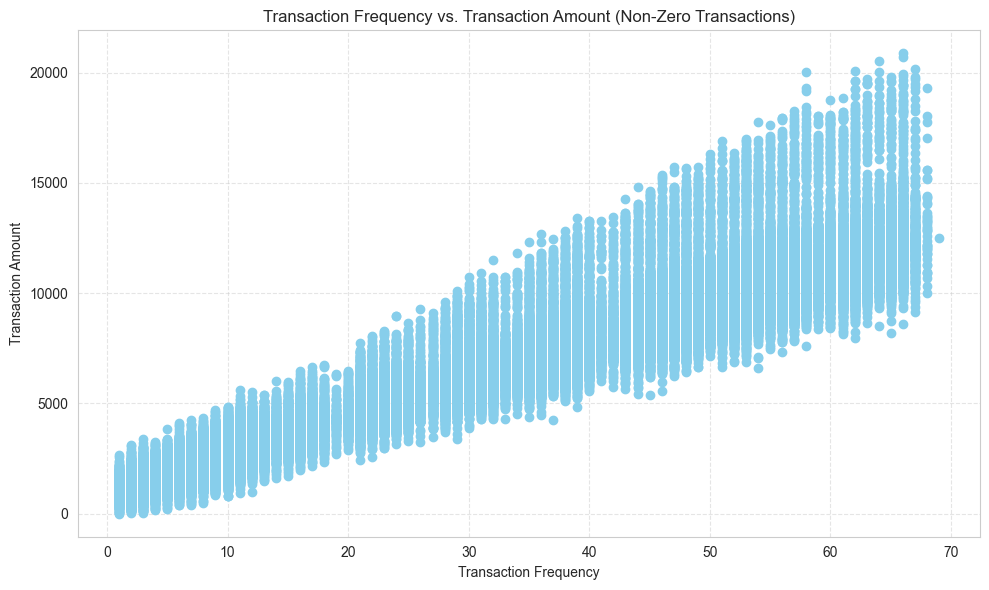

In [ ]:
from sklearn.neighbors import KernelDensity

trans_df = pd.read_csv('./data/Daily Household Transactions.csv')

trans_df['Date'] = pd.to_datetime(trans_df['Date'], errors='coerce')

trans_df = trans_df.dropna(subset=['Date'])

trans_df['Date'] = trans_df['Date'].dt.strftime('%Y-%m-%d')

trans_df['Year'] = trans_df['Date'].str[:4].astype(int)
trans_df['Month'] = trans_df['Date'].str[5:7].astype(int)
trans_df['Day'] = trans_df['Date'].str[8:10].astype(int)
# print(trans_df['Date'].head(20))

exchange_rate_inr_to_sgd = 0.016
trans_df['Amount'] = trans_df['Amount'] * exchange_rate_inr_to_sgd
trans_df['Amount'] = trans_df['Amount'].round(2)


monthly_data = trans_df.groupby(['Year', 'Month']).agg({'Amount': 'sum', 'Date': 'count'}).reset_index()
monthly_data.rename(columns={'Amount': 'TotalAmount', 'Date': 'Frequency'}, inplace=True)
monthly_data['AvgTransactionPerMonth'] = monthly_data['TotalAmount'] / monthly_data['Frequency']

# print(monthly_data.head(20))


kde_freq = KernelDensity(bandwidth=1, kernel='gaussian')
kde_amount = KernelDensity(bandwidth=25, kernel='gaussian')

kde_freq.fit(monthly_data['Frequency'].values.reshape(-1, 1))
kde_amount.fit(monthly_data['AvgTransactionPerMonth'].values.reshape(-1, 1))

new_freq_samples = kde_freq.sample(len(bank_df_train)).reshape(-1)
new_amount_samples = kde_amount.sample(len(bank_df_train)).reshape(-1)

new_freq_samples_2 = kde_freq.sample(len(bank_df_test)).reshape(-1)
new_amount_samples_2 = kde_amount.sample(len(bank_df_test)).reshape(-1)

bank_df_train['TransactionFreq'] = new_freq_samples
bank_df_train['TransactionFreq'] = bank_df_train['TransactionFreq'].astype(int)
bank_df_train['TransactionAmt'] = new_amount_samples
percentile_75 = bank_df_train['TransactionAmt'].quantile(0.75)
# bank_df_train['TransactionAmt'] = bank_df_train['TransactionAmt'].apply(lambda x: max(x, percentile_75))

min_value = bank_df_train['TransactionAmt'].min()
max_value = bank_df_train['TransactionAmt'].max()
bank_df_train['TransactionAmt'] = ((bank_df_train['TransactionAmt'] - min_value) / (max_value - min_value)) * (percentile_75 - min_value) + percentile_75
print(bank_df_train[['TransactionFreq', 'TransactionAmt']].head(10))


bank_df_train['TransactionAmt'] = bank_df_train['TransactionAmt'] * bank_df_train['TransactionFreq']


bank_df_test['TransactionFreq'] = new_freq_samples_2
bank_df_test['TransactionFreq'] = bank_df_test['TransactionFreq'].astype(int)
bank_df_test['TransactionAmt'] = new_amount_samples_2

bank_df_train.loc[(bank_df_train['Exited'] == 1) | (bank_df_train['MonthsInactive'] > 0), ['TransactionFreq', 'TransactionAmt']] = 0

non_zero_mask = (bank_df_train['TransactionFreq'] != 0) & (bank_df_train['TransactionAmt'] != 0)
noise_freq = np.random.normal(0, 0.00, len(bank_df_train))
noise_amt = np.random.normal(1000, 500, len(bank_df_train))

bank_df_train.loc[non_zero_mask, 'TransactionFreq'] += noise_freq[non_zero_mask]
bank_df_train.loc[non_zero_mask, 'TransactionAmt'] += noise_amt[non_zero_mask]

bank_df_train['TransactionAmt'] = bank_df_train['TransactionAmt'].abs().round(2)

print(bank_df_train[['TransactionFreq', 'TransactionAmt']].head(10))
print(bank_df_train.describe)



non_zero_rows = bank_df_train[bank_df_train['TransactionAmt'] != 0] 
plt.figure(figsize=(10, 6))
plt.scatter(non_zero_rows['TransactionFreq'], non_zero_rows['TransactionAmt'], color='skyblue')
plt.title('Transaction Frequency vs. Transaction Amount (Non-Zero Transactions)')
plt.xlabel('Transaction Frequency')
plt.ylabel('Transaction Amount')
plt.grid(axis='both', linestyle='--', alpha=0.5)  
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.neighbors import KernelDensity

# trans_df = pd.read_csv('./data/Daily Household Transactions.csv')
# trans_df['Date'] = pd.to_datetime(trans_df['Date'], errors='coerce')
# trans_df = trans_df.dropna(subset=['Date'])
# trans_df = trans_df[~((trans_df['Date'].dt.year == 2018) & (trans_df['Date'].dt.month == 9))]

# max_date = trans_df['Date'].max()
# today = pd.to_datetime('today').normalize()
# date_diff = today - max_date
# trans_df['Date'] += date_diff

# exchange_rate_inr_to_sgd = 0.016
# trans_df['Amount'] = trans_df['Amount'] * exchange_rate_inr_to_sgd
# trans_df['Amount'] = trans_df['Amount'].round(2)

# print(trans_df.head())



### 16. Transaction History Amt
Detailed transaction data offers insights into spending patterns and engagement. (Transaction amount in the last 28 days)


In [ ]:
# # Import reference set
# # Warning: File size slightly big
# trans_hist_data = pd.read_excel('./data/transaction_history.xlsx')

# trans_hist_data.dtypes
# # trans_hist_data.describe()

# # Extract the most recent 2 sets of 3 months assuming the most recent data is the most accurate
# trans_1st_3mths = trans_hist_data[(trans_hist_data['DATE'] >= pd.to_datetime('2019-01')) & (trans_hist_data['DATE'] <= pd.to_datetime('2019-03'))]
# trans_2ns_3mths = trans_hist_data[(trans_hist_data['DATE'] >= pd.to_datetime('2018-10')) & (trans_hist_data['DATE'] <= pd.to_datetime('2018-12'))]

# trans_dist_data = trans_1st_3mths.groupby('Account No').agg({'VALUE DATE': 'size', 'WITHDRAWAL AMT':'sum', 'DEPOSIT AMT': 'sum'}).reset_index()
# trans_dist_data['TOTAL AMT'] = -trans_dist_data['WITHDRAWAL AMT'] + trans_dist_data['DEPOSIT AMT']

# # kde = gaussian_kde(trans_dist_data['VALUE DATE'])
# # train['Transaction Freq'] = abs(kde.resample(n_train).flatten()).astype(int)

# kde = gaussian_kde(trans_dist_data['TOTAL AMT'])
# bank_df_train['Cashflow'] = kde.resample(n_train).flatten().astype(float)
# bank_df_test['Cashflow'] = kde.resample(n_test).flatten().astype(float)

# date_28_days_ago = datetime.now() - timedelta(days=28)

# bank_df_train['Cashflow'] = np.where(
#     (bank_df_train['ChurnDate'] <= date_28_days_ago),
#     0,
#     bank_df_train['Cashflow']
# )

# bank_df_train['Cashflow'] = np.where(
#     (bank_df_train['TransactionFreq'] == 0),
#     0,
#     bank_df_train['Cashflow']
# )

# bank_df_test['Cashflow'] = np.where(
#     (bank_df_test['TransactionFreq'] == 0),
#     0,
#     bank_df_test['Cashflow']
# )

# new_min = -20000
# new_max = 20000

# current_min = bank_df_train['Cashflow'].min()
# current_max = bank_df_train['Cashflow'].max()

# # Perform Min-Max scaling
# bank_df_train['Cashflow'] = ((bank_df_train['Cashflow'] - current_min) / (current_max - current_min)) * (new_max - new_min) + new_min


# print(bank_df_train[['ChurnDate', 'TransactionFreq', 'Cashflow']].head(20))
# # print(bank_df_test[['TransactionFreq', 'TransactionAmt']].head(20))

In [ ]:
#np.random.uniform(0, 1, size=bank_df_train.shape[0])

#bank_df_train.loc[bank_df_train['TransactionAmt'] > bank_df_train['Balance'], 'TransactionAmt'] = bank_df_train.loc[bank_df_train['TransactionAmt'] > bank_df_train['Balance'], 'TransactionAmt'] * unif[bank_df_train['TransactionAmt'] > bank_df_train['Balance']]
#bank_df_train['TransactionAmt'] > bank_df_train['Balance'] == True

# print(bank_df_train['TransactionAmt'].head(20))

### 17.Service Support Frequency (per mth)

In [ ]:

support_freq = pd.read_csv("./data/support_frequency.csv")
kde = gaussian_kde(support_freq['no_of_cases'])
resampled_train = abs(kde.resample(len(bank_df_train)).flatten() / 12).astype(int)
resampled_test = abs(kde.resample(len(bank_df_test)).flatten() / 12).astype(int)

bank_df_train['ServiceSupportFrequency'] = resampled_train
bank_df_test['ServiceSupportFrequency'] = resampled_test

print(bank_df_train['ServiceSupportFrequency'])


0         21
1          2
2          1
3         27
4         13
          ..
165029    36
165030    34
165031    24
165032    38
165033     3
Name: ServiceSupportFrequency, Length: 165034, dtype: int32


### 18.Months Inactive
Indicates customer disengagement, potentially preceding churn. 

In [ ]:
# np.random.seed(3101)
# bank_df_train['MonthsInactive'] = np.minimum(np.random.normal(0.5, 1.5, n_train), bank_df_train['Tenure'] * 12)
# bank_df_train['MonthsInactive'] = np.maximum(bank_df_train['MonthsInactive'], 0)

# bank_df_test['MonthsInactive'] = bank_df_test.apply(lambda row: 
#     np.random.normal(0.5, 1.5) if row['TransactionFreq'] == 0 else 0,
#     axis=1)

# def set_max_to_tenure(row):
#     return min(row['MonthsInactive'], row['Tenure'])

# bank_df_train['MonthsInactive'] = np.maximum(bank_df_train['MonthsInactive'], 0)
# bank_df_train['MonthsInactive'] = bank_df_train.apply(set_max_to_tenure, axis=1)
# bank_df_train['MonthsInactive'] = bank_df_train['MonthsInactive'].astype(int)
# bank_df_test['MonthsInactive'] = np.maximum(bank_df_test['MonthsInactive'], 0)
# bank_df_test['MonthsInactive'] = bank_df_test.apply(set_max_to_tenure, axis=1)
# bank_df_test['MonthsInactive'] = bank_df_test['MonthsInactive'].astype(int)



# # print(bank_df_train['MonthsInactive'].head(20))
# print(bank_df_test['MonthsInactive'].head(20))

### 19.Net Promoter Score (NPS)
Measure of customer satisfaction and loyalty.
Scaled from 1 to 10 


In [ ]:
nps = pd.read_csv('./data/NPS.csv')

nps_data = nps.groupby('Customer Name').agg({'NPS':'mean'}).reset_index()
kde = gaussian_kde(nps_data['NPS'])
resampled_train = abs(kde.resample(len(bank_df_train)).flatten()).astype(int)
resampled_test = abs(kde.resample(len(bank_df_test)).flatten()).astype(int)

bank_df_train['NPS'] = np.ceil(resampled_train / 12 * 10)
bank_df_test['NPS'] = np.ceil(resampled_test / 12 * 10)

print(bank_df_train['NPS'].describe())

count   165034.000000
mean         5.739284
std          2.986092
min          0.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: NPS, dtype: float64


### 20.Education
Education level might influence financial behavior and churn.
Shld be correlated to 5. Acct Balance


In [ ]:
education_marital = pd.read_csv("./data/education_marital.csv")

education = education_marital['Education_Level'].unique()

edu, counts = np.unique(education, return_counts=True)
value_to_index = {value: i for i, value in enumerate(edu)}
numerical_data = [value_to_index[value] for value in education]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)

pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [edu[index] for index in resampled_indices]
resampled_values_test = [edu[index] for index in resampled_indices_test]

bank_df_train['Education'] = resampled_values
bank_df_test['Education'] = resampled_values_test

def convert_phd_to_postdoc(edu_level):
    if edu_level == 'PHD':
        # Randomly choose between 'PHD' and 'Post-Doc' with equal probability
        return np.random.choice(['PHD', 'Post-Doc'])
    else:
        return edu_level  # Keep other education levels unchanged

bank_df_train['Education'].replace({'Unknown': 'PSLE'}, inplace=True)
bank_df_train['Education'].replace({'Uneducated': 'O/N'}, inplace=True)
bank_df_train['Education'].replace({'High School': 'A'}, inplace=True)
bank_df_train['Education'].replace({'College': 'Diploma'}, inplace=True)
bank_df_train['Education'].replace({'Graduate': 'Bachelors'}, inplace=True)
bank_df_train['Education'].replace({'Post-Graduate': 'Masters'}, inplace=True)
bank_df_train['Education'].replace({'Doctorate': 'PHD'}, inplace=True)

bank_df_train['Education'] = bank_df_train['Education'].apply(convert_phd_to_postdoc)

bank_df_test['Education'].replace({'Unknown': 'PSLE'}, inplace=True)
bank_df_test['Education'].replace({'Uneducated': 'O/N'}, inplace=True)
bank_df_test['Education'].replace({'High School': 'A'}, inplace=True)
bank_df_test['Education'].replace({'College': 'Diploma'}, inplace=True)
bank_df_test['Education'].replace({'Graduate': 'Bachelors'}, inplace=True)
bank_df_test['Education'].replace({'Post-Graduate': 'Masters'}, inplace=True)
bank_df_test['Education'].replace({'Doctorate': 'PHD'}, inplace=True)

bank_df_test['Education'] = bank_df_test['Education'].apply(convert_phd_to_postdoc)

print(bank_df_train['Education'].head(30))

C:\Users\caboo\AppData\Local\Temp\ipykernel_16088\910833916.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_train['Education'].replace({'Unknown': 'PSLE'}, inplace=True)
C:\Users\caboo\AppData\Local\Temp\ipykernel_16088\910833916.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

0           PHD
1          PSLE
2             A
3     Bachelors
4           PHD
5     Bachelors
6           O/N
7     Bachelors
8          PSLE
9           PHD
10          O/N
11    Bachelors
12          PHD
13      Masters
14            A
15      Masters
16            A
17          PHD
18            A
19         PSLE
20     Post-Doc
21    Bachelors
22         PSLE
23            A
24      Masters
25      Masters
26          O/N
27      Diploma
28            A
29          PHD
Name: Education, dtype: object


# salary redo

In [ ]:
salary_df = pd.read_csv('./data/Salary_Data.csv')
salary_df_cleaned = salary_df.dropna(subset=['Education Level'])
print(salary_df_cleaned['Education Level'].unique())

bachelors_df = salary_df_cleaned[salary_df_cleaned['Education Level'] == "Bachelor's"]
masters_df = salary_df_cleaned[salary_df_cleaned['Education Level'] == "Master's"]
phd_df = salary_df_cleaned[salary_df_cleaned['Education Level'] == 'PhD']

kde_bachelors = gaussian_kde(bachelors_df['Salary'])
kde_masters = gaussian_kde(masters_df['Salary'])
kde_phd = gaussian_kde(phd_df['Salary'])

condition_bachelors = (bank_df_train['Education'] == "PSLE") | \
                      (bank_df_train['Education'] == "O/N") | \
                      (bank_df_train['Education'] == "A") | \
                      (bank_df_train['Education'] == "Diploma") | \
                      (bank_df_train['Education'] == "Bachelors")
condition_masters = bank_df_train['Education'] == "Masters"
condition_phd = (bank_df_train['Education'] == "PhD") | \
                (bank_df_train['Education'] == "Post-Doc'") 

bank_df_train['EstimatedSalary'] = np.where(
    condition_bachelors,
    abs(kde_bachelors.resample(n_train).flatten() / 12).astype(int),
    np.where(
        condition_masters,
        abs(kde_masters.resample(n_train).flatten() / 12).astype(int),
        abs(kde_phd.resample(n_train).flatten() / 12).astype(int),
    )
)
print(bank_df_train[['Education', 'EstimatedSalary'])

["Bachelor's" "Master's" 'PhD']


KeyError: "['EstimatedSalary_2'] not in index"

### 21.Employment Status
Indicates financial stability, affecting churn likelihood. 
Shld be correlated to 5. Acct Balance & 21. Education  

In [ ]:
employment = pd.read_csv("./data/employment.csv")

employment_data = employment['job'].unique()

employment_status, counts = np.unique(employment_data, return_counts=True)
value_to_index = {value: i for i, value in enumerate(employment_status)}
numerical_data = [value_to_index[value] for value in employment_data]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)
pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [employment_status[index] for index in resampled_indices]
resampled_values_test = [employment_status[index] for index in resampled_indices_test]

bank_df_train['EmploymentStatus'] = resampled_values
bank_df_test['EmploymentStatus'] = resampled_values_test

bank_df_train['EmploymentStatus'].replace({'admin.': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'blue-collar': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'entrepreneur': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'housemaid': 'Parttime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'management': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'retired': 'Retired'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'student': 'Student'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'services': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'self-employed': 'Self-employed'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'technician': 'Parttime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'unemployed': 'Unemployed'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'unknown': 'Parttime'}, inplace=True)

bank_df_test['EmploymentStatus'].replace({'admin.': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'blue-collar': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'entrepreneur': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'housemaid': 'Parttime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'management': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'retired': 'Retired'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'student': 'Student'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'services': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'self-employed': 'Self-employed'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'technician': 'Parttime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'unemployed': 'Unemployed'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'unknown': 'Parttime'}, inplace=True)

print(bank_df_train['EmploymentStatus'].head(20))

C:\Users\caboo\AppData\Local\Temp\ipykernel_16088\1694598254.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_train['EmploymentStatus'].replace({'admin.': 'Fulltime'}, inplace=True)
C:\Users\caboo\AppData\Local\Temp\ipykernel_16088\1694598254.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

0          Parttime
1           Student
2          Fulltime
3           Student
4          Fulltime
5          Parttime
6          Fulltime
7          Parttime
8          Parttime
9          Fulltime
10         Parttime
11         Fulltime
12         Fulltime
13         Fulltime
14         Parttime
15    Self-employed
16          Student
17          Retired
18       Unemployed
19    Self-employed
Name: EmploymentStatus, dtype: object


### 22.Marital Status
Can impact financial decision-making and churn behavior. 

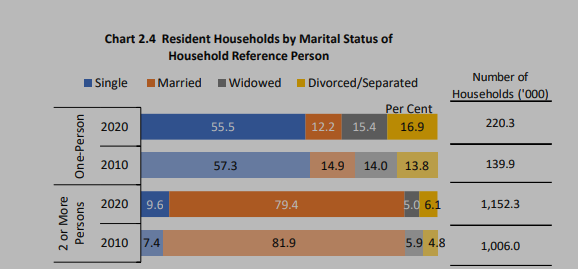

[0.16952641316778871, 0.6855695892192502, 0.06663588479524293, 0.07826811281771828]
MaritalStatus
Married    0.685259
Single     0.174340
Divorced   0.075542
Widowed    0.064859
Name: proportion, dtype: float64


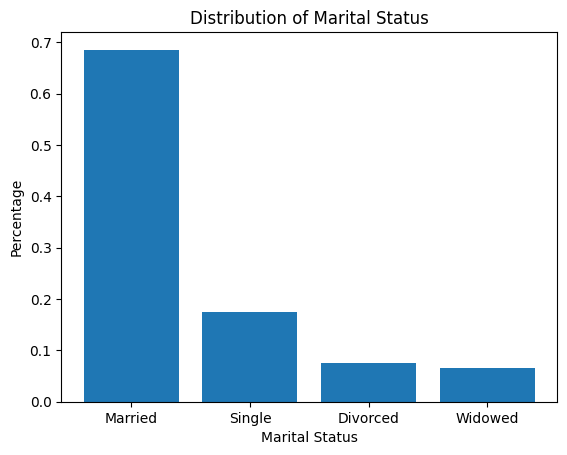

In [ ]:
percentage_single = (55.5 * 220.3 + 9.6 * 1152.3) / (220.3 + 1152.3)
percentage_married = (12.2 * 220.3 + 79.4 * 1152.3) / (220.3 + 1152.3)
percentage_widowed = (15.4 * 220.3 + 5 * 1152.3) / (220.3 + 1152.3) #25 above
percentage_divorced = (16.9 * 220.3 + 6.1 * 1152.3) / (220.3 + 1152.3) #25 above

marital_status = ['Single', 'Married', 'Widowed', 'Divorced']
total_percentage = percentage_single + percentage_married + percentage_widowed + percentage_divorced
normalized_percentages = [percentage_single / total_percentage,
                           percentage_married / total_percentage,
                           percentage_widowed / total_percentage,
                           percentage_divorced / total_percentage]
print(normalized_percentages)

bank_df_train['MaritalStatus'] = np.random.choice(['Single', 'Married', 'Widowed', 'Divorced'],
                                                   size=len(bank_df_train), p=normalized_percentages)


young_divorced_widowed_indices = bank_df_train[(bank_df_train['Age'] < 25) & (bank_df_train['MaritalStatus'].isin(['Widowed', 'Divorced']))].index
bank_df_train.loc[young_divorced_widowed_indices, 'MaritalStatus'] = 'Single'


# print(bank_df_train[['Age', 'MaritalStatus']].head(20))
marital_status_distribution = bank_df_train['MaritalStatus'].value_counts(normalize=True)
print(marital_status_distribution)

arital_status_distribution = bank_df_train['MaritalStatus'].value_counts(normalize=True)
plt.bar(marital_status_distribution.index, marital_status_distribution.values)
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Distribution of Marital Status')
plt.show()

In [ ]:
# education_marital = pd.read_csv("./data/education_marital.csv")

# marital_status = education_marital['Marital_Status'].unique()

# marital, counts = np.unique(marital_status, return_counts=True)
# value_to_index = {value: i for i, value in enumerate(marital)}
# numerical_data = [value_to_index[value] for value in marital_status]

# kde = gaussian_kde(numerical_data)

# x_values = np.unique(numerical_data)
# pdf_values = kde(x_values)

# pmf = pdf_values / np.sum(pdf_values)

# resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
# resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

# resampled_values = [marital[index] for index in resampled_indices]
# resampled_values_test = [marital[index] for index in resampled_indices_test]

# bank_df_train['MaritalStatus'] = resampled_values
# bank_df_test['MaritalStatus'] = resampled_values_test

# bank_df_train['MaritalStatus'].replace({'Unknown': 'Divorced'}, inplace=True)
# bank_df_test['MaritalStatus'].replace({'Unknown': 'Divorced'}, inplace=True)

# print(bank_df_train['MaritalStatus'].head(20))

### 23.Housing Status
Reflects stability and long-term commitment, influencing churn. 

In [ ]:
housing = pd.read_csv("./data/housing.csv")

housing_status = housing['House_Ownership'].unique()

house, counts = np.unique(housing_status, return_counts=True)
value_to_index = {value: i for i, value in enumerate(house)}
numerical_data = [value_to_index[value] for value in housing_status]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)

pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [house[index] for index in resampled_indices]
resampled_values_test = [house[index] for index in resampled_indices_test]

bank_df_train['HousingStatus'] = resampled_values
bank_df_test['HousingStatus'] = resampled_values_test


print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0           1  Okwudilichukwu          668    France   Male   33       6   
1   1           2   Okwudiliolisa          627    France   Male   33       1   
2   2           3           Hsueh          678    France   Male   40      19   
3   3           4             Kao          581    France   Male   34       3   
4   4           5       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  MonthsInactive  TransactionFreq  \
0 133877.390000              2  ...        1.000000                0   
1 124654.360000              2  ...        0.000000                6   
2 152137.330000              2  ...        2.000000                0   
3 148882.540000              1  ...        0.000000               31   
4 118487.510000              2  ...        0.000000               40   

   TransactionAmt  ServiceSupportFrequency      NPS  Education  \
0        0.000000   

### 24.Number of Dependents
Impacts financial priorities and risk tolerance, affecting churn.

In [ ]:
dependents_df = pd.read_csv('./data/education+dependents+maritalstatus/BankChurners.csv')

kde = gaussian_kde(dependents_df['Dependent_count'])

bank_df_train['Dependents'] = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
bank_df_train['Dependents'] = np.round(bank_df_train['Dependents']).astype(int)
bank_df_test['Dependents'] = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
bank_df_test['Dependents'] = np.round(bank_df_test['Dependents']).astype(int)

print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0           1  Okwudilichukwu          668    France   Male   33       6   
1   1           2   Okwudiliolisa          627    France   Male   33       1   
2   2           3           Hsueh          678    France   Male   40      19   
3   3           4             Kao          581    France   Male   34       3   
4   4           5       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  TransactionFreq  TransactionAmt  \
0 133877.390000              2  ...                0        0.000000   
1 124654.360000              2  ...                6     1504.220000   
2 152137.330000              2  ...                0        0.000000   
3 148882.540000              1  ...               31     7793.130000   
4 118487.510000              2  ...               40     8507.080000   

   ServiceSupportFrequency      NPS  Education  EstimatedSalary_2  \
0                

### 25.Marketing Offers Accepted
Indicates responsiveness to incentives, affecting churn. Range 0-1, (percentage of marketing offers they accept, e.g.5 offer, 4 accepted, the value of the column 0.8)

In [ ]:
marketing_df = pd.read_csv('./data/marketing offers/marketing_campaign.csv', sep=';')


marketing_df["MarketingOffersAcceptance"] = (marketing_df['AcceptedCmp1'] + marketing_df['AcceptedCmp2'] + marketing_df['AcceptedCmp3'] + marketing_df['AcceptedCmp4'] + marketing_df['AcceptedCmp5']) / 5
# print(marketing_df.head())

kde = gaussian_kde(marketing_df['MarketingOffersAcceptance'])

bank_df_train['MarketingOffersAcceptance'] = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
bank_df_test['MarketingOffersAcceptance'] = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)

print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0           1  Okwudilichukwu          668    France   Male   33       6   
1   1           2   Okwudiliolisa          627    France   Male   33       1   
2   2           3           Hsueh          678    France   Male   40      19   
3   3           4             Kao          581    France   Male   34       3   
4   4           5       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  TransactionAmt  ServiceSupportFrequency  \
0 133877.390000              2  ...        0.000000                       21   
1 124654.360000              2  ...     1504.220000                        2   
2 152137.330000              2  ...        0.000000                        1   
3 148882.540000              1  ...     7793.130000                       27   
4 118487.510000              2  ...     8507.080000                       13   

       NPS  Education EstimatedSalary_

### 26.Channel Used for Transactions
Reflects preferred banking channels and engagement level. 
https://www.straitstimes.com/business/cards-are-king-when-it-comes-to-making-payment-in-singapore-report

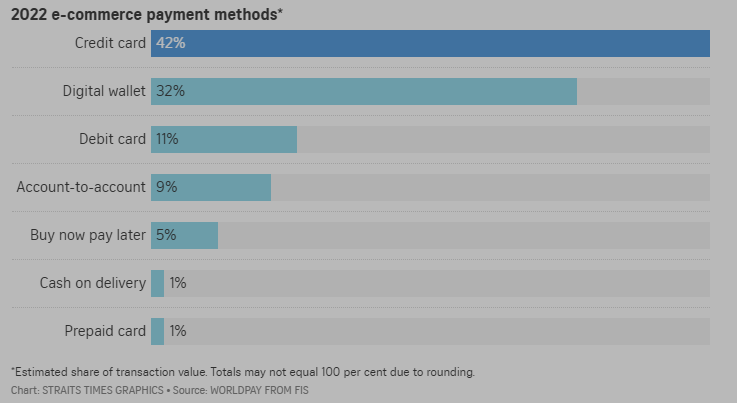

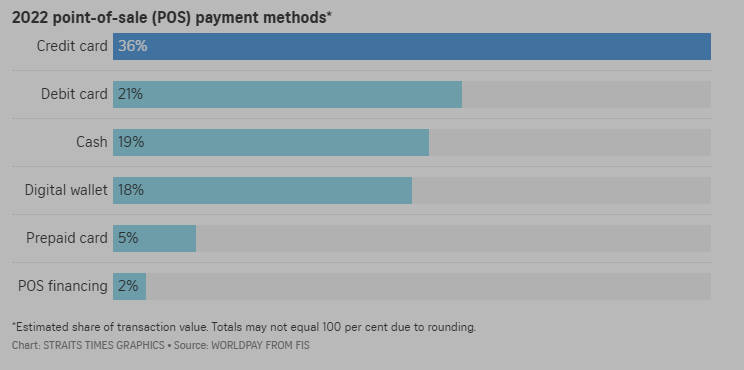

[0.34782608695652173, 0.5434782608695652, 0.09782608695652174, 0.010869565217391304]
0      FAST
1    Paynow
2     Debit
3    Paynow
4     Debit
5      FAST
6     Debit
7    Paynow
8     Debit
9    Paynow
Name: PaymentMethod, dtype: object


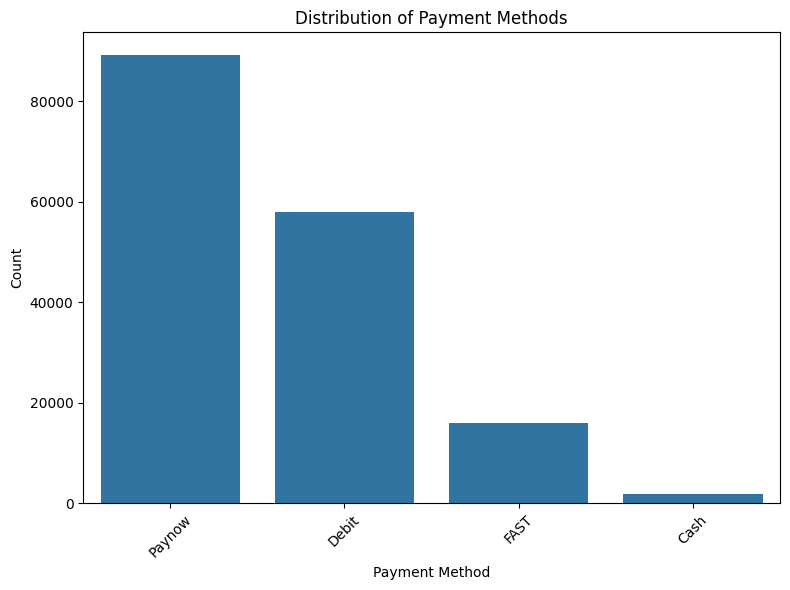

In [ ]:
Debit = 11 + 21
Paynow = 32 + 18
FAST = 9
Cash = 1

Payment_methods = ['Debit', 'Paynow', 'FAST', 'Cash']
total = Debit + Paynow + FAST + Cash
percentages = [Debit / total, Paynow / total, FAST / total, Cash / total]

print(percentages)

bank_df_train['PaymentMethod'] = np.random.choice(Payment_methods,
                                                   size=len(bank_df_train), p=percentages)

print(bank_df_train['PaymentMethod'].head(10))

payment_counts = bank_df_train['PaymentMethod'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



In [ ]:
# transaction_channel_df = pd.read_csv('./data/main_payment_method/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# # print(transaction_channel_df.head())
# methods = transaction_channel_df['PaymentMethod'].unique().tolist()
# # print(methods)
# faked_data = [random.choice(methods) for _ in range(len(bank_df_train))]
# faked_data_2 = [random.choice(methods) for _ in range(len(bank_df_test))]

# bank_df_train['PaymentMethod'] = faked_data
# bank_df_test['PaymentMethod'] = faked_data_2

# bank_df_train['PaymentMethod'].replace({'Bank transfer (automatic)': 'Intrabank transfer (GXS Savings Account only)'}, inplace=True)
# bank_df_train['PaymentMethod'].replace({'Electronic check': 'PayNow'}, inplace=True)
# bank_df_train['PaymentMethod'].replace({'Credit card (automatic)': 'Debit card'}, inplace=True)
# bank_df_train['PaymentMethod'].replace({'Mailed check': 'FAST'}, inplace=True)

# bank_df_test['PaymentMethod'].replace({'Bank transfer (automatic)': 'Intrabank transfer (GXS Savings Account only)'}, inplace=True)
# bank_df_test['PaymentMethod'].replace({'Electronic check': 'PayNow'}, inplace=True)
# bank_df_test['PaymentMethod'].replace({'Credit card (automatic)': 'Debit card'}, inplace=True)
# bank_df_test['PaymentMethod'].replace({'Mailed check': 'FAST'}, inplace=True)

# print(bank_df_train['PaymentMethod'].head(10))

# payment_method_distribution = bank_df_train['PaymentMethod'].value_counts(normalize=True)
# print(payment_method_distribution)

# plt.figure(figsize=(8, 6))
# payment_method_distribution.plot(kind='bar', color='skyblue')
# plt.title('Distribution of Payment Methods')
# plt.xlabel('Payment Method')
# plt.ylabel('Proportion')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# plt.tight_layout()
# plt.show()

### 27.Customer Satisfaction Surveys
Provides direct feedback on satisfaction levels, predicting churn. 

0    2
1    1
2    5
3    1
4    2
5    1
6    3
7    5
8    5
9    2
Name: CustomerSatisfaction, dtype: int32


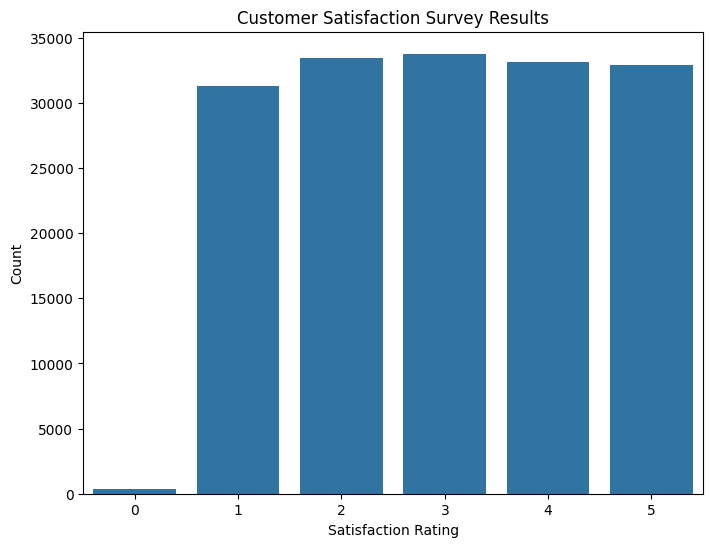

In [ ]:
cust_satisfaction_df = pd.read_csv('./data/satisfaction score/Customer-Churn-Records.csv')

kde = gaussian_kde(cust_satisfaction_df['Satisfaction Score'])

fake_data = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
fake_data = np.minimum(fake_data.flatten(), 5)
fake_data = np.round(fake_data).astype(int)

fake_data_2 = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
fake_data_2 = np.minimum(fake_data_2.flatten(), 5)
fake_data_2 = np.round(fake_data_2).astype(int)

bank_df_train['CustomerSatisfaction'] = fake_data
bank_df_test['CustomerSatisfaction'] = fake_data_2
# print(len(bank_df_test))
# print(len(fake_data_2))

print(bank_df_train['CustomerSatisfaction'].head(10))

satisfaction_counts = bank_df_train['CustomerSatisfaction'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values)
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.title('Customer Satisfaction Survey Results')
plt.show()

### 28.Feature Satisfaction
Scale on 1 to 5


In [ ]:
feature_df = pd.read_csv('./data/feature_and_support_satisfaction/Customer-survey-data.csv')
feature_df = feature_df.dropna()
kde = gaussian_kde(feature_df['How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied'])
bank_df_train['FeatureSatisfaction'] = kde.resample(len(bank_df_train)).flatten().astype(int)
bank_df_test['FeatureSatisfaction'] = kde.resample(len(bank_df_test)).flatten().astype(int)

print(bank_df_train['FeatureSatisfaction'].head())

0    3
1    4
2    1
3    1
4    0
Name: FeatureSatisfaction, dtype: int32


### 29.Support Satisfaction
Scale on 1 to 5


In [ ]:
feature_df = pd.read_csv('./data/feature_and_support_satisfaction/Customer-survey-data.csv')
feature_df = feature_df.dropna()
kde = gaussian_kde(feature_df['How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied'])
bank_df_train['SupportSatisfaction'] = kde.resample(len(bank_df_train)).flatten().astype(int)
bank_df_test['SupportSatisfaction'] = kde.resample(len(bank_df_test)).flatten().astype(int)

print(bank_df_train['SupportSatisfaction'].head())

0    4
1    4
2    1
3    2
4    2
Name: SupportSatisfaction, dtype: int32


### 30. Feature support frequency

Higher calls might indicate issues and dissatisfaction, affecting churn. Past year. Past month 


In [ ]:
support_freq = pd.read_csv("./data/support_frequency.csv")

kde = gaussian_kde(support_freq['no_of_cases'])
bank_df_train['FeatureSupportFrequency'] = abs(kde.resample(n_train).flatten()/12).astype(int)
bank_df_test['FeatureSupportFrequency'] = abs(kde.resample(n_test).flatten()/12).astype(int)
print(bank_df_train.head())


   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0           1  Okwudilichukwu          668    France   Male   33       6   
1   1           2   Okwudiliolisa          627    France   Male   33       1   
2   2           3           Hsueh          678    France   Male   40      19   
3   3           4             Kao          581    France   Male   34       3   
4   4           5       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  EmploymentStatus  MaritalStatus  \
0 133877.390000              2  ...          Parttime        Married   
1 124654.360000              2  ...           Student        Widowed   
2 152137.330000              2  ...          Fulltime        Married   
3 148882.540000              1  ...           Student        Married   
4 118487.510000              2  ...          Fulltime        Married   

   HousingStatus  Dependents MarketingOffersAcceptance  PaymentMethod  \
0          ow

### 31.Relationship Count
Reflects the breadth of the customer's relationship with the bank.
Shld be correlated to 6: No. of products   

C:\Users\caboo\AppData\Local\Temp\ipykernel_16088\607543198.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  relationship_count['Current Loan Amount'].fillna(0, inplace=True)


0   16492.240000
1   12479.650000
2   25774.750000
3   10890.130000
4   17431.360000
5   14634.180000
6   15798.380000
7   28194.720000
8   26954.470000
9   10121.770000
Name: LoanAmt, dtype: float64
30000.0
3000.0


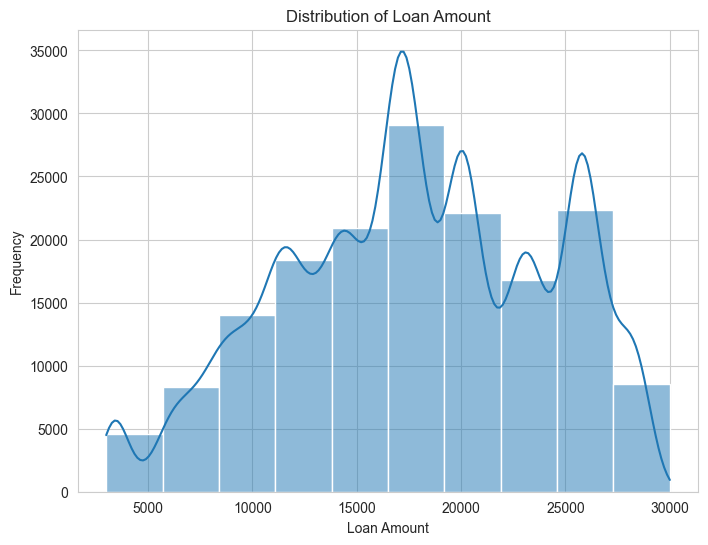

In [ ]:
import seaborn as sns
relationship_count = pd.read_csv('./data/loan/credit_train.csv')
relationship_count['Current Loan Amount'].fillna(0, inplace=True) 
relationship_count = relationship_count[relationship_count['Current Loan Amount'] <= 200000]

if np.any(np.isinf(relationship_count['Current Loan Amount'])):
    # Handle infinite values, such as replacing them with a large finite value
    relationship_count['Current Loan Amount'].replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)


median_loan_amount = relationship_count['Current Loan Amount'].median()
below_median = relationship_count[relationship_count['Current Loan Amount'] < median_loan_amount]
above_median = relationship_count[relationship_count['Current Loan Amount'] >= median_loan_amount]

# print(above_median)
kde_upper = gaussian_kde(above_median['Current Loan Amount'])
kde_lower = gaussian_kde(below_median['Current Loan Amount'])

bank_df_train['LoanAmt'] = np.where(bank_df_train['CustomerSatisfaction'] >= 4, abs(kde_upper.resample(n_train).flatten()/12).astype(int) , abs(kde_lower.resample(n_train).flatten()/12).astype(int))
bank_df_test['LoanAmt'] = np.where(bank_df_test['CustomerSatisfaction'] >= 4, abs(kde_upper.resample(n_test).flatten()/12).astype(int) , abs(kde_lower.resample(n_test).flatten()/12).astype(int))

min_value = bank_df_train['LoanAmt'].min()
max_value = bank_df_train['LoanAmt'].max()
min_value_2 = bank_df_test['LoanAmt'].min()
max_value_2 = bank_df_test['LoanAmt'].max()
new_min_value = 3000
new_max_value = 30000

def scale_values(value):
    scaled_value = new_min_value + ((value - min_value) / (max_value - min_value)) * (new_max_value - new_min_value)
    return scaled_value

def scale_values_2(value):
    scaled_value = new_min_value + ((value - min_value_2) / (max_value_2 - min_value_2)) * (new_max_value - new_min_value)
    return scaled_value

bank_df_train['LoanAmt'] = bank_df_train['LoanAmt'].apply(scale_values)
bank_df_test['LoanAmt'] = bank_df_test['LoanAmt'].apply(scale_values_2)

bank_df_train['LoanAmt'] = bank_df_train['LoanAmt'].round(2)
# kde = gaussian_kde(relationship_count['Current Loan Amount'])
# bank_df_train['RelationshipCount'] = abs(kde.resample(n_train).flatten()/12).astype(int)

print(bank_df_train['LoanAmt'].head(10))
print(bank_df_train['LoanAmt'].max())
print(bank_df_train['LoanAmt'].min())

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.histplot(bank_df_train['LoanAmt'], kde=True, bins=10)  # Adjust the number of bins as needed
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

### 32. Income Source
Indicates financial stability and potential churn risk. 

  EmploymentStatus IncomeSource
0         Parttime   Employment
1          Student    Allowance
2         Fulltime   Investment
3          Student    Allowance
4         Fulltime   Employment
5         Parttime   Employment
6         Fulltime   Investment
7         Parttime   Employment
8         Parttime   Employment
9         Fulltime   Investment
IncomeSource
Employment        0.484337
Investment        0.259256
Self-employment   0.097125
Allowance         0.070307
Rental            0.056570
Retirement        0.032405
Name: proportion, dtype: float64


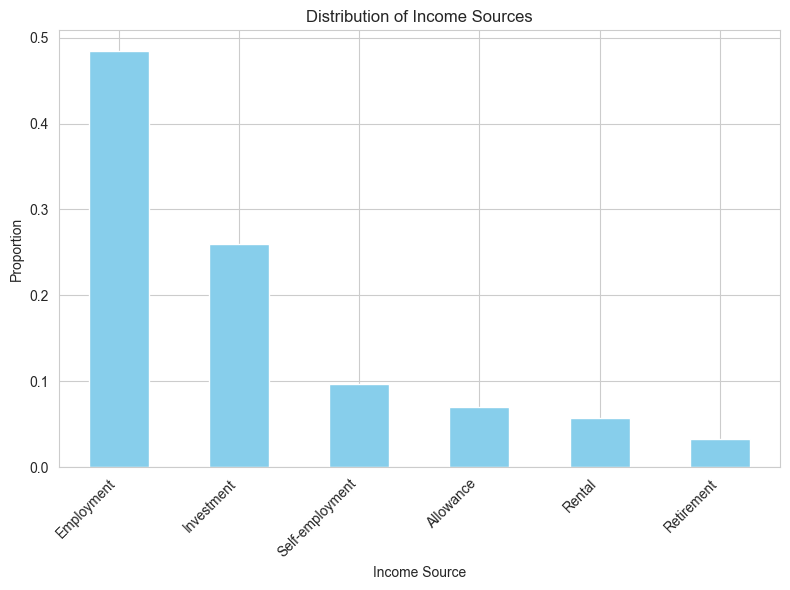

In [ ]:
# income_source_df = pd.read_csv('./data/income source/adult.csv')

# # print(transaction_channel_df.head())
# income_sourcs = income_source_df['workclass'].unique().tolist()
# income_sourcs.remove('?')
# print(income_sourcs)
# faked_data = [random.choice(income_sourcs) for _ in range(len(bank_df_train))]
# faked_data_2 = [random.choice(income_sourcs) for _ in range(len(bank_df_test))]

# bank_df_train['IncomeSource'] = faked_data
# bank_df_test['IncomeSource'] = faked_data_2

def choose_value(row):
    if row['EmploymentStatus'] == 'Fulltime':
        return np.random.choice(['Employment', 'Investment'])
    elif row['EmploymentStatus'] == 'Parttime':
        return 'Employment' 
    elif row['EmploymentStatus'] == 'Retired':
        return np.random.choice(['Retirement', 'Rental', 'Investment'])
    elif row['EmploymentStatus'] == 'Student':
        return np.random.choice(['Allowance', 'Employment'])
    elif row['EmploymentStatus'] == 'Self-employed':
        return 'Self-employment'
    elif row['EmploymentStatus'] == 'Unemployed':
        return np.random.choice(['Rental', 'Investment', 'Allowance'])
    
bank_df_train['IncomeSource'] = bank_df_train.apply(choose_value, axis=1)
print(bank_df_train[['EmploymentStatus', 'IncomeSource']].head(10))

income_distribution = bank_df_train['IncomeSource'].value_counts(normalize=True)
print(income_distribution)

plt.figure(figsize=(8, 6))
income_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Income Sources')
plt.xlabel('Income Source')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### 33. Credit Utilization
Reflects financial health and potential churn risk for credit customers.

In [ ]:
credit_df = pd.read_csv('./data/credit utilization/BankChurners.csv')

kde = gaussian_kde(credit_df['Avg_Utilization_Ratio'])

fake_data = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
fake_data = np.minimum(fake_data.flatten(), 1)
# fake_data = np.round(fake_data).astype(int)
fake_data_2 = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
fake_data_2 = np.minimum(fake_data_2.flatten(), 1)

bank_df_train['CreditUtilization'] = fake_data
bank_df_test['CreditUtilization'] = fake_data_2

print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0           1  Okwudilichukwu          668    France   Male   33       6   
1   1           2   Okwudiliolisa          627    France   Male   33       1   
2   2           3           Hsueh          678    France   Male   40      19   
3   3           4             Kao          581    France   Male   34       3   
4   4           5       Chiemenam          716     Spain   Male   33       9   

        Balance  NumOfProducts  ...  Dependents  MarketingOffersAcceptance  \
0 133877.390000              2  ...           2                   0.012697   
1 124654.360000              2  ...           1                   0.000000   
2 152137.330000              2  ...           2                   0.000000   
3 148882.540000              1  ...           3                   0.000000   
4 118487.510000              2  ...           2                   0.000000   

   PaymentMethod  CustomerSatisfaction FeatureSati

### 34. Response to Previous Retention Efforts
Records success or failure of previous retention efforts, guiding future strategies. % 0-1. Using a beta distribution to model this. 

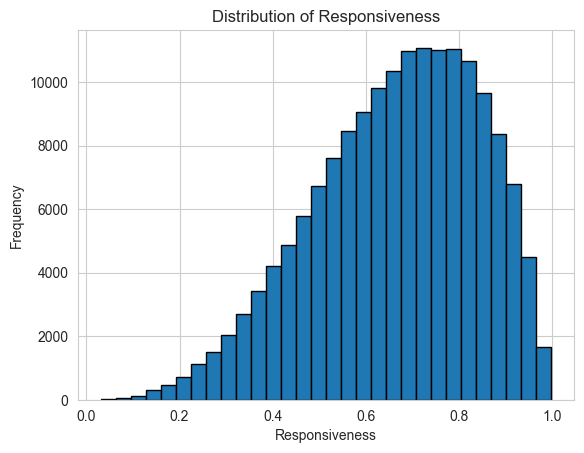

In [ ]:
alpha = 4
beta = 2

responsiveness_values = np.random.beta(alpha, beta, size=n_train)

bank_df_train['Retention'] = responsiveness_values

plt.hist(bank_df_train['Retention'], bins=30, edgecolor='black')
plt.xlabel('Responsiveness')
plt.ylabel('Frequency')
plt.title('Distribution of Responsiveness')
plt.show()

In [ ]:
# retention_df = pd.read_csv('./data/retention/HR_comma_sep.csv')

# kde = gaussian_kde(retention_df['promotion_last_5years'])

# fake_data = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
# fake_data = np.minimum(fake_data.flatten(), 1)

# fake_data_2 = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
# fake_data_2 = np.minimum(fake_data_2.flatten(), 1)


# bank_df_train['Retention'] = fake_data
# bank_df_test['Retention'] = fake_data_2

# print(bank_df_train['Retention'].head(20))

# filtered_retention_rate = bank_df_train[bank_df_train['Retention'] < 0.2]['Retention']


# sns.kdeplot(filtered_retention_rate, shade=True)
# plt.xlabel('Retention Rate')
# plt.ylabel('Density')
# plt.title('Kernel Density Estimation of Retention Rate (<0.2)')
# plt.show()

### 35. Change in behavior before n after
Average of percentage of increase/decrease (ranging from 0 - infinity, but most of the times it will be ard 0-2)

In [ ]:
bank_df_train['ChangeInBehaviourMkt'] = np.random.normal(1, 0.25, len(bank_df_train))
bank_df_train['ChangeInBehaviourMkt'] = np.maximum(bank_df_train['ChangeInBehaviourMkt'], 0)
bank_df_test['ChangeInBehaviourMkt']= np.random.normal(1, 0.25, len(bank_df_test))
# test = np.random.normal(1, 0.25, len(bank_df_train))
# # print(test)
# bank_df_train['ChangeInBehaviourMkt'] = test.astype(float)

print(bank_df_train['ChangeInBehaviourMkt'].head(10))

0   0.835819
1   1.395447
2   0.729923
3   0.788653
4   1.430327
5   0.778717
6   0.740384
7   0.757044
8   0.946419
9   1.261127
Name: ChangeInBehaviourMkt, dtype: float64


### 36. Change in behavior before n after for Support

In [ ]:
bank_df_train['ChangeInBehaviourCust'] = np.random.normal(1, 0.25, len(bank_df_train))
bank_df_train['ChangeInBehaviourCust'] = np.maximum(bank_df_train['ChangeInBehaviourCust'], 0)
bank_df_test['ChangeInBehaviourCust']= np.random.normal(1, 0.25, len(bank_df_test))

print(bank_df_train['ChangeInBehaviourCust'].head())

0   1.184195
1   0.833610
2   0.953758
3   1.200082
4   0.756611
Name: ChangeInBehaviourCust, dtype: float64


### 37. Previous Lifecycle status 

In [ ]:
life_cycles = ['Active', 'Reactivated'] #everything but churned

# bank_df_train['PrevLifecycle'] = bank_df_train.apply(lambda row: np.random.choice(life_cycles) if row['Tenure'] > 1 else ('Churned' if row['Exited'] == 1 else np.nan), axis=1)
# bank_df_test['PrevLifecycle'] = np.where(bank_df_test['Tenure'] > 1,
#                                           np.random.choice(life_cycles, size=len(bank_df_test)),
#                                           np.nan)

bank_df_train['PrevLifecycle'] = bank_df_train.apply(
    lambda row: 'Churned' if (pd.Timestamp.now() - row['ChurnDate']) >= pd.Timedelta(days=29) - pd.Timedelta(days=29) else 'Dormant' if row['MonthsInactive'] > 1 else np.random.choice(life_cycles) if row['Tenure'] > 1 else np.nan,
    axis=1
)

# bank_df_test['PrevLifecycle'] = np.where(
#     bank_df_test['Exited'] == 1,
#     'Churned',
#     np.where(
#         bank_df_test['Tenure'] > 1,
#         np.random.choice(life_cycles, size=len(bank_df_test)),
#         np.nan
#     )
# )

print(bank_df_train[['ChurnDate', 'Tenure', 'MonthsInactive', 'PrevLifecycle']].head(50))
# print(bank_df_test[['Tenure', 'PrevLifecycle']].head(20))

    ChurnDate  Tenure  MonthsInactive PrevLifecycle
0         NaT       6        1.000000   Reactivated
1         NaT       1        0.000000           NaN
2         NaT      19        2.000000       Dormant
3         NaT       3        0.000000        Active
4         NaT       9        0.000000        Active
5  2024-01-22       8             NaN       Churned
6         NaT      14        2.000000       Dormant
7         NaT       1        1.000000           NaN
8         NaT       7        1.000000        Active
9         NaT       7        0.000000   Reactivated
10        NaT      11        0.000000        Active
11        NaT       5        0.000000   Reactivated
12        NaT      17        0.000000        Active
13        NaT       9        1.000000        Active
14        NaT      12        0.000000   Reactivated
15        NaT       9        1.000000        Active
16        NaT      12        2.000000       Dormant
17        NaT       8        0.000000   Reactivated
18 2024-01-2

### 38. Current Lifecycle status 

In [ ]:
prev_active = ['Active', 'Dormant'] #excluding churn, also same for reactivated
prev_dormant = ['Dormant', 'Reactivated'] #excluding churn

# bank_df_train['CurrLifecycle'] = bank_df_train.apply(lambda row: 'Churned' if row['PrevLifecycle'] == 'Churned' else \
#                                                     np.random.choice(prev_active) if (row['PrevLifecycle'] == 'Active' or row['PrevLifecycle'] == 'Reactivated') else \
#                                                     np.random.choice(prev_dormant) if row['PrevLifecycle'] == 'Dormant' else \
#                                                     np.nan, axis=1)
bank_df_train['CurrLifecycle'] = bank_df_train.apply(lambda row: 'Churned' if not pd.isnull(row['ChurnDate']) else \
                                                     'Reactivated' if (row['PrevLifecycle'] == 'Dormant' and row['TransactionFreq'] > 0) else \
                                                     'Dormant' if row['TransactionFreq'] == 0 else \
                                                     'Active', axis=1)

print(bank_df_train[['PrevLifecycle', 'CurrLifecycle']].head(20))

print(bank_df_train[['PrevLifecycle', 'CurrLifecycle']].value_counts())


   PrevLifecycle CurrLifecycle
0    Reactivated       Dormant
1            NaN        Active
2        Dormant       Dormant
3         Active        Active
4         Active        Active
5        Churned       Churned
6        Dormant       Dormant
7            NaN       Dormant
8         Active       Dormant
9    Reactivated        Active
10        Active        Active
11   Reactivated        Active
12        Active        Active
13        Active       Dormant
14   Reactivated        Active
15        Active       Dormant
16       Dormant       Dormant
17   Reactivated        Active
18       Churned       Churned
19       Churned       Churned
PrevLifecycle  CurrLifecycle
Reactivated    Active           37889
Active         Active           37886
Churned        Churned          34921
Dormant        Dormant          18843
Reactivated    Dormant          12631
Active         Dormant          12591
Name: count, dtype: int64


### 39. Customer Happiness Status 
1 == happy, 0 == unhappy

Customer satisfaction survey score 

Relationship Count 

Response to previous retention efforts (no more yay)

if we want the top 15.9%


In [ ]:
happiness_benchmark = 50

# bank_df_train['Happiness'] = bank_df_train.apply(lambda row: 1 if row['CustomerSatisfaction'] + \
#                                                                   row['FeatureSatisfaction'] + \
#                                                                   row['SupportSatisfaction'] + \
#                                                                   row['NPS'] + \
#                                                                   row['Tenure'] >= happiness_benchmark else \
#                                                                   0, axis=1)


# need to delete Custpercentile, RsPercentile and ResponsePercentile later
bank_df_train['CustPercentile'] = bank_df_train['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['CustomerSatisfaction'], x))
bank_df_train['RsPercentile'] = bank_df_train['NumOfProducts'].apply(lambda x: stats.percentileofscore(bank_df_train['CustomerSatisfaction'], x))

bank_df_test['CustPercentile'] = bank_df_test['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['CustomerSatisfaction'], x))
bank_df_test['RsPercentile'] = bank_df_test['NumOfProducts'].apply(lambda x: stats.percentileofscore(bank_df_test['CustomerSatisfaction'], x))

# print(bank_df_train['CustPercentile'].head(10))
bank_df_train['Happiness'] = bank_df_train.apply(lambda row: 1 if (row['CustPercentile'] > happiness_benchmark and \
                                                                   row['RsPercentile'] > happiness_benchmark ) else 0, axis=1)
bank_df_train.drop(columns=['CustPercentile', 'RsPercentile'], inplace=True)

bank_df_test['Happiness'] = bank_df_test.apply(lambda row: 1 if (row['CustPercentile'] > happiness_benchmark and \
                                                                   row['RsPercentile'] > happiness_benchmark ) else 0, axis=1)
bank_df_test.drop(columns=['CustPercentile', 'RsPercentile'], inplace=True)

# print(bank_df_train['Happiness'].head(10))
# print("percentage happy =", (bank_df_train['Happiness'] == 1).mean() * 100)
print(bank_df_test['Happiness'].head(10))
print("percentage happy =", (bank_df_test['Happiness'] == 1).mean() * 100)

KeyboardInterrupt: 

### 40.Price Sensitivity %
26. marketing offers accepted %
35. change in behaviour %

Mkting Offers Accepted
Change in behavior before n after for mkting offer 


In [ ]:
# MarketingOffersAcceptance_df = bank_df_train['MarketingOffersAcceptance'].apply(lambda x: stats.percentileofscore(bank_df_train['MarketingOffersAcceptance'], x))
# ChangeInBehaviourMkt_df = bank_df_train['ChangeInBehaviourMkt'].apply(lambda x: stats.percentileofscore(bank_df_train['ChangeInBehaviourMkt'], x))

# MarketingOffersAcceptance_df_2 = bank_df_test['MarketingOffersAcceptance'].apply(lambda x: stats.percentileofscore(bank_df_test['MarketingOffersAcceptance'], x))
# ChangeInBehaviourMkt_df_2 = bank_df_test['ChangeInBehaviourMkt'].apply(lambda x: stats.percentileofscore(bank_df_test['ChangeInBehaviourMkt'], x))
# # print(MarketingOffersAcceptance_df.head())
# # print(ChangeInBehaviourMkt_df.head())
# bank_df_train['PriceSensitivity'] = (MarketingOffersAcceptance_df + ChangeInBehaviourMkt_df) / 2
# bank_df_test['PriceSensitivity'] = (MarketingOffersAcceptance_df_2 + ChangeInBehaviourMkt_df_2) / 2

# print(bank_df_train['PriceSensitivity'].head(20))

In [ ]:
bank_df_train['Savings Savant'] = ((bank_df_train['MarketingOffersAcceptance'].rank(pct=True)*100).astype(int)+(bank_df_train['ChangeInBehaviourMkt'].rank(pct=True)*100).astype(int))/2
bank_df_test['Savings Savant'] = ((bank_df_test['MarketingOffersAcceptance'].rank(pct=True)*100).astype(int)+(bank_df_test['ChangeInBehaviourMkt'].rank(pct=True)*100).astype(int))/2

### 41.Feature Driven % 
28. Customer satisfaction survey 0-5
6. num products 1-4
29. Feature Satisfaction 0-5

Number of products last 1 year
Feature Satisfaction Column (0 to 1)
Feature Support freq


In [ ]:
# print(bank_df_train['NumOfProducts'].max())
# print(bank_df_train['NumOfProducts'].min())

# feature_driven = bank_df_train['CustomerSatisfaction'] + bank_df_train['NumOfProducts'] + bank_df_train['FeatureSatisfaction']
# percentiles = np.percentile(feature_driven, [0, 25, 50, 75, 100]) 

# def assign_percentile(metric):
#     if metric <= percentiles[1]:
#         return ((metric / percentiles[1]) * 25)
#     elif metric <= percentiles[2]:
#         return (25 + ((metric - percentiles[1]) / (percentiles[2] - percentiles[1])) * 25)
#     elif metric <= percentiles[3]:
#         return (50 + ((metric - percentiles[2]) / (percentiles[3] - percentiles[2])) * 25)
#     else:
#         return (75 + ((metric - percentiles[3]) / (percentiles[4] - percentiles[3])) * 25)
        
# bank_df_train['FeatureSensitivity'] = feature_driven.apply(assign_percentile)
# bank_df_train['FeatureSensitivity'] = bank_df_train['FeatureSensitivity'].replace(np.NaN, 0, regex=True)

# CustomerSatisfaction_df = bank_df_train['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['CustomerSatisfaction'], x))
# NumOfProducts_df = bank_df_train['NumOfProducts'].apply(lambda x: stats.percentileofscore(bank_df_train['NumOfProducts'], x))
# FeatureSatisfaction_df = bank_df_train['FeatureSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['FeatureSatisfaction'], x))
# FeatureSupportFrequency_df = bank_df_train['FeatureSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_train['FeatureSatisfaction'], x))

# CustomerSatisfaction_df_2 = bank_df_test['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['CustomerSatisfaction'], x))
# NumOfProducts_df_2 = bank_df_test['NumOfProducts'].apply(lambda x: stats.percentileofscore(bank_df_test['NumOfProducts'], x))
# FeatureSatisfaction_df_2 = bank_df_test['FeatureSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['FeatureSatisfaction'], x))
# FeatureSupportFrequency_df_2 = bank_df_test['FeatureSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_test['FeatureSatisfaction'], x))

# bank_df_train['FeatureSensitivity'] = (CustomerSatisfaction_df + NumOfProducts_df + FeatureSatisfaction_df + FeatureSupportFrequency_df) / 4
# bank_df_test['FeatureSensitivity'] = (CustomerSatisfaction_df_2 + NumOfProducts_df_2 + FeatureSatisfaction_df_2 + FeatureSupportFrequency_df_2) / 4

# print(bank_df_train['FeatureSensitivity'].head(20))

In [ ]:
bank_df_train['Digital Dynamos'] = ((bank_df_train['CustomerSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_train['NumOfProducts'].rank(pct=True)*100).astype(int)+(bank_df_train['FeatureSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_train['FeatureSupportFrequency'].rank(pct=True)*100).astype(int))/4
bank_df_test['Digital Dynamos'] = ((bank_df_test['CustomerSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_test['NumOfProducts'].rank(pct=True)*100).astype(int)+(bank_df_test['FeatureSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_test['FeatureSupportFrequency'].rank(pct=True)*100).astype(int))/4


### 42.Service Dependent % 
31. service support freq per month number
39. Customer Happiness Status binary
36. Change in behavior before n after for Support %

CALL Support frequency
Support Satisfaction Column (0 to 1)
Change in behavior before n after support

In [ ]:
# print(bank_df_train['ServiceSupportFrequency'])
# CallSupportFrequency_df = bank_df_train['CallSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_train['CallSupportFrequency'], x))
# ServiceSupportFrequency_df = bank_df_train['ServiceSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_train['ServiceSupportFrequency'], x))
# SupportSatisfaction_df = bank_df_train['SupportSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['SupportSatisfaction'], x))
# ChanegInBehaviourCust_df = bank_df_train['ChanegInBehaviourCust'].apply(lambda x: stats.percentileofscore(bank_df_train['ChanegInBehaviourCust'], x))

# ServiceSupportFrequency_df_2 = bank_df_test['ServiceSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_test['ServiceSupportFrequency'], x))
# SupportSatisfaction_df_2 = bank_df_test['SupportSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['SupportSatisfaction'], x))
# ChanegInBehaviourCust_df_2 = bank_df_test['ChanegInBehaviourCust'].apply(lambda x: stats.percentileofscore(bank_df_test['ChanegInBehaviourCust'], x))

# bank_df_train['ServiceSensitivity'] = (ServiceSupportFrequency_df + SupportSatisfaction_df + ChanegInBehaviourCust_df) / 3
# bank_df_test['ServiceSensitivity'] = (ServiceSupportFrequency_df_2 + SupportSatisfaction_df_2 + ChanegInBehaviourCust_df_2) / 3

# print(bank_df_train['ServiceSensitivity'].head())

In [ ]:
bank_df_train['Trustee Tribe'] = ((bank_df_train['ServiceSupportFrequency'].rank(pct=True)*100).astype(int)+(bank_df_train['SupportSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_train['ChangeInBehaviourCust'].rank(pct=True)*100).astype(int))/3
bank_df_test['Trustee Tribe'] = ((bank_df_test['ServiceSupportFrequency'].rank(pct=True)*100).astype(int)+(bank_df_test['SupportSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_test['ChangeInBehaviourCust'].rank(pct=True)*100).astype(int))/3
print(bank_df_train['Trustee Tribe'].head())

0   88.666667
1   23.000000
2   55.000000
3   59.333333
4   57.333333
Name: Trustee Tribe, dtype: float64


### 43.Customer Personas 

In [ ]:
print(bank_df_train[['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']])

        Savings Savant  Digital Dynamos  Trustee Tribe
0            64.500000        57.000000      88.666667
1            55.500000        48.250000      23.000000
2            15.000000        58.500000      55.000000
3            44.000000        35.250000      59.333333
4            39.000000        57.500000      57.333333
...                ...              ...            ...
165029       79.500000        57.750000      66.333333
165030       21.000000        24.000000      75.000000
165031       89.000000        51.000000      47.666667
165032       77.000000        37.750000      64.666667
165033       43.500000        48.750000      17.666667

[165034 rows x 3 columns]


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Restore default warning behavior after your code
# warnings.simplefilter(action='default', category=FutureWarning)

persona_df = bank_df_train[['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']]
largest_values = persona_df.max(axis=1)
smallest_values = persona_df.min(axis=1)

sum_values = persona_df.sum(axis=1)
second_largest_values = sum_values - largest_values - smallest_values
first_diff = largest_values - second_largest_values
second_diff = largest_values - smallest_values

def get_columns(row):
    sorted_indices = np.argsort(row)[::-1]  
    largest_index = sorted_indices[0]  
    second_largest_index = sorted_indices[1] 
    smallest_index = sorted_indices[-1] 
    return (persona_df.columns[largest_index], persona_df.columns[second_largest_index], persona_df.columns[smallest_index])

columns_tuple = persona_df.apply(get_columns, axis=1)
bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']] = pd.DataFrame(columns_tuple.tolist(), index=persona_df.index)
bank_df_train.loc[first_diff > 10, ['SecondPersona', 'ThirdPersona']] = np.nan
bank_df_train.loc[second_diff > 10, ['ThirdPersona']] = np.nan

print(bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']].head(10))

persona_df_2 = bank_df_test[['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']]
largest_values_2 = persona_df_2.max(axis=1)
smallest_values_2 = persona_df_2.min(axis=1)

sum_values_2 = persona_df_2.sum(axis=1)
second_largest_values_2 = sum_values_2 - largest_values_2 - smallest_values_2
first_diff_2 = largest_values_2 - second_largest_values_2
second_diff_2 = largest_values_2 - smallest_values_2

columns_tuple_2 = persona_df_2.apply(get_columns, axis=1)
bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona']] = pd.DataFrame(columns_tuple_2.tolist()).reset_index(drop=True)

bank_df_test.loc[first_diff_2 > 10, ['SecondPersona', 'ThirdPersona']] = np.nan
bank_df_test.loc[second_diff_2 > 10, ['ThirdPersona']] = np.nan

print(bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona']].head(20))
# print(persona_df_2.head(10))


      FirstPersona    SecondPersona ThirdPersona
0    Trustee Tribe              NaN          NaN
1   Savings Savant  Digital Dynamos          NaN
2  Digital Dynamos    Trustee Tribe          NaN
3    Trustee Tribe              NaN          NaN
4  Digital Dynamos    Trustee Tribe          NaN
5  Digital Dynamos              NaN          NaN
6   Savings Savant    Trustee Tribe          NaN
7    Trustee Tribe              NaN          NaN
8  Digital Dynamos              NaN          NaN
9  Digital Dynamos              NaN          NaN
       FirstPersona    SecondPersona     ThirdPersona
0     Trustee Tribe   Savings Savant              NaN
1     Trustee Tribe   Savings Savant              NaN
2   Digital Dynamos              NaN              NaN
3    Savings Savant              NaN              NaN
4     Trustee Tribe  Digital Dynamos              NaN
5   Digital Dynamos   Savings Savant              NaN
6   Digital Dynamos   Savings Savant    Trustee Tribe
7    Savings Savant    Truste

In [ ]:
columns_to_normalize = ['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']

bank_df_train[columns_to_normalize] = bank_df_train[columns_to_normalize].div(bank_df_train[columns_to_normalize].sum(axis=1), axis=0) * 100
# bank_df_train['CustomerPersona'] = bank_df_train[columns_to_normalize].idxmax(axis=1)

bank_df_test[columns_to_normalize] = bank_df_test[columns_to_normalize].div(bank_df_test[columns_to_normalize].sum(axis=1), axis=0) * 100
# bank_df_test['CustomerPersona'] = bank_df_test[columns_to_normalize].idxmax(axis=1)

print(bank_df_train[['Savings Savant', 'Digital Dynamos', 'Trustee Tribe']])

        Savings Savant  Digital Dynamos  Trustee Tribe
0            30.689929        27.121332      42.188739
1            43.786982        38.067061      18.145957
2            11.673152        45.525292      42.801556
3            31.749850        25.435959      42.814191
4            25.352113        37.378115      37.269772
...                ...              ...            ...
165029       39.050348        28.366762      32.582890
165030       17.500000        20.000000      62.500000
165031       47.424512        27.175844      25.399645
165032       42.916860        21.040409      36.042731
165033       39.575436        44.351782      16.072782

[165034 rows x 3 columns]


### 44. Social Influencer

0    0
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    1
9    0
Name: SocialInfluencer, dtype: int64
percentage social influencer = 52.162584679520585


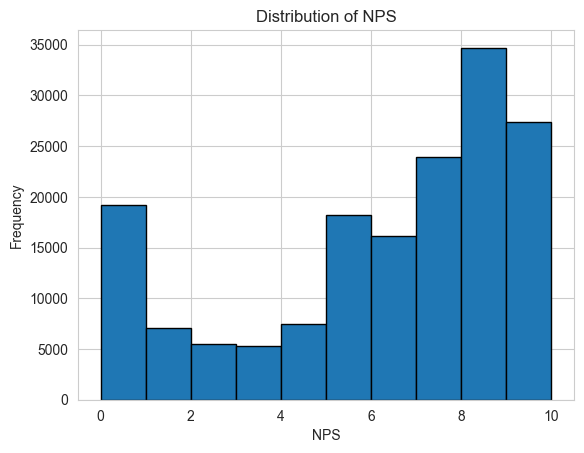

In [ ]:
social_benchmark = 84.1

bank_df_train['SocialInfluencer'] = bank_df_train['NPS'].apply(lambda x: stats.percentileofscore(bank_df_train['NPS'], x))
bank_df_train['SocialInfluencer'] = bank_df_train.apply(lambda row: 1 if (row['SocialInfluencer'] > happiness_benchmark) else 0, axis=1)

bank_df_test['SocialInfluencer'] = bank_df_test['NPS'].apply(lambda x: stats.percentileofscore(bank_df_test['NPS'], x))
bank_df_test['SocialInfluencer'] = bank_df_test.apply(lambda row: 1 if (row['SocialInfluencer'] > happiness_benchmark) else 0, axis=1)

print(bank_df_train['SocialInfluencer'].head(10))
print("percentage social influencer =", (bank_df_train['SocialInfluencer'] == 1).mean() * 100)


plt.hist(bank_df_train['NPS'], bins=10, edgecolor='black')
plt.xlabel('NPS')
plt.ylabel('Frequency')
plt.title('Distribution of NPS')
plt.show()

### 45. Combined Personas column

In [ ]:
# bank_df_train['CombinedPersonas'] = bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
# bank_df_test['CombinedPersonas'] = bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
def combine_personas(row):
    if ('Savings Savant' in row.values) and ('Digital Dynamos' in row.values) and ('Trustee Tribe' in row.values):
        return 'Triple Advantage Allies'
    elif ('Savings Savant' in row.values) and ('Digital Dynamos' in row.values):
        return 'Frugal Innovators'
    elif ('Savings Savant' in row.values) and ('Trustee Tribe' in row.values):
        return 'Cost-Conscious Careseekers'
    elif ('Digital Dynamos' in row.values) and ('Trustee Tribe' in row.values):
        return 'Premium Patrons'
    elif 'Savings Savant' in row.values:
        return 'Savings Savant'
    elif 'Digital Dynamos' in row.values:
        return 'Digital Dynamos'
    elif 'Trustee Tribe' in row.values:
        return 'Trustee Tribe'
bank_df_train['CombinedPersonas'] = bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']].apply(combine_personas, axis=1)
print(bank_df_train['CombinedPersonas'].head(10))

0                 Trustee Tribe
1             Frugal Innovators
2               Premium Patrons
3                 Trustee Tribe
4               Premium Patrons
5               Digital Dynamos
6    Cost-Conscious Careseekers
7                 Trustee Tribe
8               Digital Dynamos
9               Digital Dynamos
Name: CombinedPersonas, dtype: object


# Removing useless columns

In [ ]:
# print(bank_df_train.dtypes)
useless_cols = ['id', 'Surname', 'Geography', 'Exited', 'IsActiveMember', 'CreditScore', 'HasCrCard', 'CreditUtilization']
useless_cols_2 = ['id', 'CustomerId', 'Surname', 'Geography', 'IsActiveMember', 'CreditScore', 'HasCrCard', 'CreditUtilization']
# to_one_hot_encode_cols = ['Gender', 'Education', 'Employment Status', 'Marital Status', 'Housing Status', 'PaymentMethod', 'IncomeSource', 'PrevLifecycle', 'CurrLifecycle', 'CustomerPersona']

bank_df_train.drop(columns=useless_cols, inplace=True)
bank_df_test.drop(columns=useless_cols_2, inplace=True)
# bank_df_train = pd.get_dummies(bank_df_train, columns=to_one_hot_encode_cols)



In [ ]:
# reference_date = bank_df_train['ChurnDate'].min()
# bank_df_train['ChurnDate_Numeric'] = (bank_df_train['ChurnDate'] - reference_date).dt.days
# bank_df_train['ChurnDate_Numeric'] = pd.to_numeric(bank_df_train['ChurnDate'])


print(bank_df_train.dtypes)
print(bank_df_train.head(10))
print(bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona', 'Happiness', 'SocialInfluencer']].head(10))

# to get our dates back
# bank_df_train['ChurnDate_Back'] = reference_date + pd.to_timedelta(bank_df_train['ChurnDate_Numeric'], unit='D')

CustomerId                            int64
Gender                               object
Age                                   int32
Tenure                                int32
Balance                             float64
NumOfProducts                         int64
EstimatedSalary                     float64
ChurnDate                    datetime64[ns]
MonthsInactive                      float64
TransactionFreq                       int32
TransactionAmt                      float64
ServiceSupportFrequency               int32
NPS                                 float64
Education                            object
EmploymentStatus                     object
MaritalStatus                        object
HousingStatus                        object
Dependents                            int32
MarketingOffersAcceptance           float64
PaymentMethod                        object
CustomerSatisfaction                  int32
FeatureSatisfaction                   int32
SupportSatisfaction             

In [ ]:
print(bank_df_test.dtypes)
print(bank_df_test.head(10))

Gender                        object
Age                            int32
Tenure                         int64
Balance                      float64
NumOfProducts                  int64
EstimatedSalary              float64
MonthsInactive                 int32
TransactionFreq                int32
TransactionAmt               float64
ServiceSupportFrequency        int32
NPS                          float64
Education                     object
EmploymentStatus              object
HousingStatus                 object
Dependents                     int32
MarketingOffersAcceptance    float64
CustomerSatisfaction           int32
FeatureSatisfaction            int32
SupportSatisfaction            int32
FeatureSupportFrequency        int32
LoanAmt                      float64
ChangeInBehaviourMkt         float64
ChangeInBehaviourCust        float64
Happiness                      int64
Savings Savant               float64
Digital Dynamos              float64
Trustee Tribe                float64
F

### One hot encoding Current Lifecycle 

In [ ]:
one_hot_encode_prev = pd.get_dummies(bank_df_train, columns=['PrevLifecycle'],dtype ='int').iloc[:,-4:]
one_hot_encode_curr = pd.get_dummies(bank_df_train, columns=['CurrLifecycle'],dtype ='int').iloc[:,-4:]
bank_df_train = pd.concat([bank_df_train, one_hot_encode_prev, one_hot_encode_curr], axis = 1)

# one_hot_encode2 = pd.get_dummies(bank_df_test, columns=['PrevLifecycle'],dtype ='int').iloc[:,-4:]
# bank_df_test = pd.concat([bank_df_test, one_hot_encode2], axis = 1)

### FOR THE TIME BEING, PUT SOME CURR LIFECYCLE = DORMANT 

In [ ]:
# n = round(bank_df_train.shape[0]*0.25)
# bank_df_train['CurrLifecycle'].iloc[:n] = "Dormant"

# print(bank_df_train['CurrLifecycle'].head)

# EDA


### 1. Correlation matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bank_df_train is your DataFrame with both numeric and categorical columns

# Create a copy of the DataFrame
encoded_df = bank_df_train.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns using LabelEncoder
for col in encoded_df.select_dtypes(include=['object']):
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Calculate correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap for all columns without numeric annotations
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')

# Customize the plot
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()

# Identify highly correlated columns
correlated_columns = []
threshold = 0.9  # Adjust as needed

for col in corr_matrix.columns:
    correlated_cols = corr_matrix.index[(corr_matrix[col] > threshold) | (corr_matrix[col] < -threshold)].tolist()
    correlated_cols.remove(col)  # Remove the current column itself
    correlated_columns.extend([(col, corr) for corr in correlated_cols])

# Print highly correlated columns and their correlations
for col, corr in correlated_columns:
    print(f"{col} and {corr}: {corr_matrix.loc[col, corr]}")

ValueError: y should be a 1d array, got an array of shape (165034, 2) instead.

In [ ]:
# Identify highly correlated columns with 'Account balance'
target_column = 'Balance'
correlated_with_target = corr_matrix[target_column].drop(target_column).sort_values(ascending=False)

# Print the most highly correlated column and its correlation value
most_correlated_column = correlated_with_target.index[0]
correlation_value = correlated_with_target.iloc[0]
print(f"The column most highly correlated with '{target_column}' is '{most_correlated_column}' with a correlation of {correlation_value:.2f}")


The column most highly correlated with 'Balance' is 'Gender' with a correlation of 0.01


In [ ]:
# Assuming 'column1' and 'column2' are the names of the two specific columns you want to find the correlation for
column1 = 'Balance'
column2 = 'Age'

# Find the correlation value between 'column1' and 'column2'
correlation_value = corr_matrix.loc[column1, column2]

# Print the correlation value
print(f"The correlation value between '{column1}' and '{column2}' is {correlation_value:.2f}")


The correlation value between 'Balance' and 'Age' is 0.00


### 2. LDA

In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# # Assuming bank_df_train is already defined and contains your data

# # Create a copy of bank_df_train
# test_df = bank_df_train.copy()

# # Separate features and target
# y = test_df['Exited']
# X = test_df.drop(columns=['Exited'])  # Drop 'Exited' column and create X

# # Convert X and y to numpy arrays
# X = np.array(X)
# y = np.array(y)

# # Reshape y to a 1D array if needed
# if y.ndim > 1:
#     y = y.ravel()

# # Initialize LDA model
# lda = LinearDiscriminantAnalysis(n_components=1)  # Set the number of components (dimensions)

# # Fit the model to the data
# lda.fit(X, y)

# # Transform the data
# X_lda = lda.transform(X)

# # Add the transformed data to the DataFrame
# test_df['LDA_Component'] = X_lda

# # Print the DataFrame with LDA component
# print(test_df)


### 3. Try MCA 

In [ ]:
#col_idx = [(i, column_name) for i, column_name in enumerate(bank_df_train.columns)]

In [ ]:
#X_train_1 = bank_df_train.iloc[:, [1] + list(range(14, 17)) + [20, 26]]
#X_train_2 = bank_df_train.iloc[:, 21:38]

In [ ]:
# mca = prince.MCA(n_components=2)
# mca = mca.fit(X_train_1)

In [ ]:
# mca.column_contributions_.head().style.format('{:.0%}')

### 4. FAMD

In [ ]:
# famd = prince.FAMD(n_components=2)
# famd = famd.fit(X_train_2)

# Export to csv

In [ ]:
from sklearn.model_selection import train_test_split
# bank_df_train.to_csv('./data/final/dataset.csv', index=False)
# bank_df_test.to_csv('./data/final/test_data.csv', index=False)

# Assuming your DataFrame is named df and contains your data
# Splitting into train and test sets with a ratio of 2:8
train_df, test_df = train_test_split(bank_df_train, test_size=0.2, random_state=42, stratify=bank_df_train['CurrLifecycle'])

# Print the sizes of the train and test sets
print("Train set size:", len(train_df))
print("Test set size:", len(test_df))

train_df.to_csv('./data/final/train.csv', index=False)
test_df.to_csv('./data/final/test.csv', index=False)

Train set size: 132027
Test set size: 33007


# Model Training

In [ ]:
bank_df_train 
bank_df_test #missing ChurnDate and CurrLifecycle

,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,MonthsInactive,TransactionFreq,TransactionAmt,ServiceSupportFrequency,...,ChangeInBehaviourMkt,ChangeInBehaviourCust,Happiness,Savings Savant,Digital Dynamos,Trustee Tribe,FirstPersona,SecondPersona,ThirdPersona,SocialInfluencer
0,Female,23,2,0.000000,2,160976.750000,0,39,63.484830,20,...,1.257327,1.174837,0,35.113636,27.613636,37.272727,Trustee Tribe,Savings Savant,NaN,1
1,Female,46,2,0.000000,1,72549.270000,0,52,27.012773,32,...,1.103456,1.331683,1,37.033969,24.855012,38.111019,Trustee Tribe,Savings Savant,NaN,1
2,Female,34,7,0.000000,2,138882.090000,0,16,45.207565,6,...,0.997328,1.137654,1,24.747475,41.919192,33.333333,Digital Dynamos,NaN,NaN,1
3,Male,36,8,0.000000,1,113931.570000,0,10,35.768359,7,...,0.761424,1.105690,0,44.329229,19.637071,36.033701,Savings Savant,NaN,NaN,0
4,Male,38,10,121263.620000,1,139431.000000,1,23,26.399135,26,...,1.080451,1.038549,0,27.645051,33.447099,38.907850,Trustee Tribe,Digital Dynamos,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,Male,29,7,116099.820000,1,148087.620000,0,9,130.808506,2,...,0.622711,1.254063,1,30.306470,30.646992,39.046538,Trustee Tribe,NaN,NaN,0
110019,Female,36,4,178032.530000,1,42181.680000,0,11,46.396096,18,...,0.867977,0.751012,0,26.017699,24.424779,49.557522,Trustee Tribe,NaN,NaN,0
110020,Male,31,2,0.000000,2,16287.380000,0,18,165.831212,20,...,1.518336,1.334776,0,29.974381,29.205807,40.819812,Trustee Tribe,NaN,NaN,0
110021,Female,32,3,0.000000,1,158816.580000,0,45,157.541850,5,...,0.843185,1.012152,0,26.470588,35.882353,37.647059,Trustee Tribe,Digital Dynamos,Savings Savant,0
